![CRM Analytics Banner](crm_analytics.webp)


# CRM Analytics for Purchase Propensity Prediction in an Online Retail Dataset

### Introduction

In this study, the Online Retail dataset has been utilized to perform CRM (Customer Relationship Management) analyses, which are frequently applied in the industry. The key analyses and their purposes are as follows:

- **Cohort Analysis**: Identifies customer retention patterns over time, helping businesses understand how customer engagement evolves.  
- **Customer Lifetime Value (CLTV) Prediction**: Using BG-NBD and Gamma-Gamma models, CLTV is estimated to evaluate the long-term value each customer brings to the business.  
- **RFM Analysis**: Segments customers based on their Recency, Frequency, and Monetary values to optimize targeted marketing strategies.  
- **Customer Purchase Propensity Prediction**: A logistic regression model is used to predict the likelihood of customer purchases, aiding in prioritizing marketing efforts.  

This comprehensive approach enables actionable insights to improve customer relationships and maximize business profitability.

GitHub repository for this project:

[https://github.com/kanitvural/CRM_analytics](https://github.com/kanitvural/CRM_analytics)


**Dataset Information**

This is a transactional data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

**Variables Table**

| **Variable Name** | **Role**       | **Type**       | **Description**                                                                         | **Units**  | **Missing Values** |
|--------------------|----------------|----------------|-----------------------------------------------------------------------------------------|------------|---------------------|
| InvoiceNo          | ID            | Categorical    | A 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation |            | No                  |
| StockCode          | ID            | Categorical    | A 5-digit integral number uniquely assigned to each distinct product                   |            | No                  |
| Description        | Feature       | Categorical    | Product name                                                                            |            | Yes                  |
| Quantity           | Feature       | Integer        | The quantities of each product (item) per transaction                                  |            | No                  |
| InvoiceDate        | Feature       | Date           | The day and time when each transaction was generated                                   |            | No                  |
| UnitPrice          | Feature       | Continuous     | Product price per unit                                                                 | Sterling   | No                  |
| CustomerID         | Feature       | Categorical    | A 5-digit integral number uniquely assigned to each customer                           |            | Yes                  |
| Country            | Feature       | Categorical    | The name of the country where each customer resides                                    |            | No                  |




**Additional Variable Information**

`InvoiceNo`: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.  

`StockCode`: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.  

`Description`: Product (item) name. Nominal.  

`Quantity`: The quantities of each product (item) per transaction. Numeric.  

`InvoiceDate`: Invoice date and time. Numeric, the day and time when each transaction was generated.  

`UnitPrice`: Unit price. Numeric, product price per unit in sterling.  

`CustomerID`: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.  

`Country`: Country name. Nominal, the name of the country where each customer resides.  

**Index:**


- [1. Data Validation and Cleaning](#1-data-validation-and-cleaning)
  - [1.1. Check General Information of Data](#11-check-general-information-of-data)
  - [1.2. Handle Missing Values](#12-handle-missing-values)
  - [1.3. Handle Duplicated Values](#13-handle-duplicated-values)
  - [1.4. Clean Records with Negative Quantity, UnitPrice Issues, and Canceled Transactions](#14-clean-records-with-negative-quantity-unitprice-issues-and-canceled-transactions)

- [2. Exploratory Data Analysis and Preprocessing](#2-exploratory-data-analysis-and-preprocessing)
  - [2.1. Categoric Variable Analysis](#21-categoric-variable-analysis)
  - [2.2. Outlier Analysis](#22-outlier-analysis)
  - [2.3. Additional Inferences](#23-additional-inferences)

- [3. Cohort Analysis](#3-cohort-analysis)

- [4. Customer Lifetime Value (CLTV) Prediction with BG-NBD and Gamma-Gamma Submodel](#4-customer-lifetime-value-cltv-prediction-with-bg-nbd-and-gamma-gamma-submodel)
  - [4.1. Data Preparation](#41-data-preparation)
  - [4.2. Building the BG-NBD Model](#42-building-the-bg-nbd-model)
  - [4.3. Building the GAMMA-GAMMA Model](#43-building-the-gamma-gamma-model)
  - [4.4. CLTV Calculation with BG-NBD and GAMMA-GAMMA Models](#44-cltv-calculation-with-bg-nbd-and-gamma-gamma-models)
  - [4.5. Creation of CLTV Segments](#45-creation-of-cltv-segments)

- [5. RFM Analysis](#5-rfm-analysis)
  - [5.1. Calculating RFM Metrics](#51-calculating-rfm-metrics)
  - [5.2. Calculating RFM Scores](#52-calculating-rfm-scores)
  - [5.3. Customer Segmentation Based on RFM Scores](#53-customer-segmentation-based-on-rfm-scores)
  - [5.4. Advanced Segmentation with KMeans Clustering Algorithm](#54-advanced-segmentation-with-kmeans-clustering-algorithm)

- [6. Creating an ML Model for Customer Purchase Propensity Prediction](#6-creating-an-ml-model-for-customer-purchase-propensity-prediction)
  - [6.1. Feature Engineering](#61-feature-engineering)
  - [6.2. Correlation Analysis](#62-correlation-analysis)
  - [6.3. Purchase Propensity Prediction Using Logistic Regression](#63-purchase-propensity-prediction-using-logistic-regression)

- [7. Conclusion](#7-conclusion)

## Installation

To run this project locally, follow these steps:

   ```bash
   git clone https://github.com/kanitvural/CRM_analytics.git
   cd CRM_analytics
   python -m venv venv
   .\venv\Scripts\activate
   pip install -r requirements.txt

  



In [2273]:
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from typing import Callable, Tuple, Union
import datetime as dt
import os
import missingno as msno
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from lifetimes import BetaGeoFitter
from lifetimes import GammaGammaFitter
from lifetimes.plotting import plot_period_transactions
import google.generativeai as genai
from dotenv import load_dotenv
from sklearn.model_selection import BaseCrossValidator
from sklearn.base import BaseEstimator
from sklearn.cluster import KMeans
from sklearn.model_selection import StratifiedKFold,train_test_split,GridSearchCV
from sklearn.preprocessing import  MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,auc,confusion_matrix,make_scorer
from imblearn.over_sampling import SMOTE
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option('display.max_colwidth', None)
plt.style.use("ggplot")
sns.set_palette(sns.diverging_palette(220, 20))

# Gemini API and configs settings
load_dotenv()
GOOGLE_API_KEY = os.getenv("GOOGLE_API_KEY")
genai.configure(api_key=GOOGLE_API_KEY)

## 1. Data Validation and Cleaning

In [2112]:
_df = pd.read_excel("./data/Online Retail.xlsx", sheet_name="Online Retail")

In [2113]:
df = _df.copy()
df = df.sort_values(by=["CustomerID", "InvoiceDate"])

In [2114]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom
14938,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,2010-12-07 14:57:00,2.10,12347.0,Iceland
14939,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,2010-12-07 14:57:00,4.25,12347.0,Iceland
14940,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,2010-12-07 14:57:00,3.25,12347.0,Iceland


### 1.2. Check general information of Data 

In [2115]:
def check_df(dataframe: pd.DataFrame) -> None:
    """
    Checks basic characteristics of the dataframe:
    - Shape
    - Column types
    - Missing values
    - Descriptive statistics for numeric and categorical columns

    Args:
    dataframe (pd.DataFrame): The pandas dataframe to be checked.
    head (int): The number of rows to display from the top (default is 5).
    """
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Missing Values #####################")
    print(dataframe.isnull().sum())
    print("##################### Numeric Values Description #####################")
    print(dataframe.describe().T)
    print("##################### Categorical Values Description #####################")
    print(dataframe.describe(include="object").T)
    print("##################### Unique Customers #####################")
    print(f"There are {df["CustomerID"].nunique(dropna=True)} unique customers in the dataset.")
    df["CustomerID"].nunique(dropna=True)


In [2116]:
check_df(df)

##################### Shape #####################
(541909, 8)
##################### Types #####################
InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object
##################### Missing Values #####################
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64
##################### Numeric Values Description #####################
                count                           mean                  min  \
Quantity     541909.0                        9.55225             -80995.0   
InvoiceDate    541909  2011-07-04 13:34:57.156386560  2010-12-01 08:26:00   
UnitPrice    541909.0                       4.611114            -11062.06   
Custome

**Validation of Date Range**

In [2117]:
df["InvoiceDate"].min()

Timestamp('2010-12-01 08:26:00')

In [2118]:
df["InvoiceDate"].max()

Timestamp('2011-12-09 12:50:00')

### 1.2. Handle Missing Values

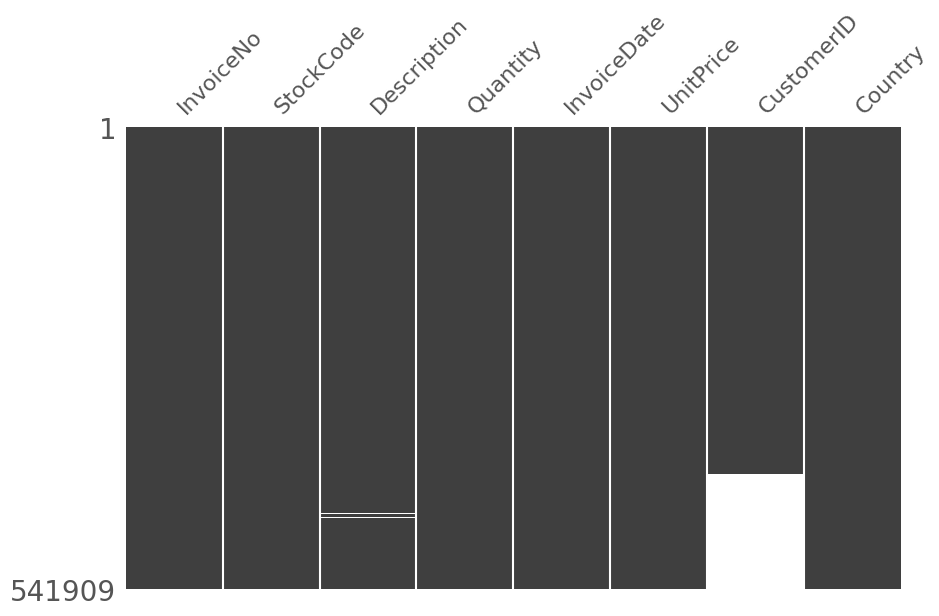

In [2119]:
fig, ax = plt.subplots(figsize=(10, 6))  
msno.matrix(df, ax=ax)  
plt.show()

**There are 135080 missing values ind the `CustomerID` field which is a significant amount. Since these missing values are directly related to the Customers, and we do not have enough information about it. Because of these reasons, these missing values have been removed from the dataset.**

**Similarly there are 1454 missing values in the `Description` field. According to dataset size these missing values represents very small amount of data. These missing values also have been removed from the dataset.**


In [2120]:
df.dropna(inplace=True)

### 1.3. Handle Duplicated Values

**There are 10062 duplicated values in the dataset. These duplicated values have been removed from the dataset.**

In [2121]:
df[df.duplicated(keep=False)].shape

(10062, 8)

In [2122]:
df[df.duplicated(keep=False)].sort_values(by="InvoiceDate").head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
521,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom


In [2123]:
df = df.drop_duplicates(keep="first")

### 1.4. The cleaning of records with negative Quantity values, UnitPrices and InvoiceNo containing 'C' (indicating canceled transactions)

In [2124]:
df[["Quantity"]].describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,401604.0,12.183273,250.283037,-80995.0,2.0,5.0,12.0,80995.0


In [2125]:
df.loc[df["InvoiceNo"].str.contains("C",na = False),:].head(1).reset_index()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom


In [2126]:
df = df[~df["InvoiceNo"].str.contains("C", na=False)] 
df = df[df["UnitPrice"] > 0]  
df = df[df["Quantity"] > 0]  

In [2127]:
check_df(df)

##################### Shape #####################
(392692, 8)
##################### Types #####################
InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object
##################### Missing Values #####################
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64
##################### Numeric Values Description #####################
                count                           mean                  min  \
Quantity     392692.0                      13.119702                  1.0   
InvoiceDate    392692  2011-07-10 19:13:07.771892480  2010-12-01 08:26:00   
UnitPrice    392692.0                       3.125914                0.001   
CustomerID   392692.0                   15287.8

## 2. Explatory Data Analysis and Preprocessing

In [2128]:
def single_variable_multiple_plot(data:pd.DataFrame, numeric:bool=True, top_n:int=10)-> None:
    """
    Visualizes a single variable in the dataset using histogram, box plot, and kernel density estimate (for numeric variables) 
    or count plot and pie chart (for categorical variables).

    Parameters:
    data : DataFrame
        The dataset.
    type : str, optional
        Data type of numerical variables. Default is 'float64'.
    numeric : bool, optional
        If True, plots will be created for numerical variables; if False, plots will be created for categorical variables. Default is True.

    Returns:
    None
    """
    
    if numeric: 
         numeric_columns= data.select_dtypes(include=["int","float"]).columns.to_list()
         for i in numeric_columns:
            fig, axes = plt.subplots(nrows=1,ncols=3, figsize=(20,4))
            sns.histplot(x=data[i],bins=5,ax=axes[0])
            axes[0].set_title(i)
            sns.boxplot(x=data[i],ax=axes[1])
            axes[1].set_title(i)
            sns.kdeplot(x=data[i],ax=axes[2])
            axes[2].set_title(i)
            plt.show()
    
    else:
         categoric_columns= [col for col in data.columns if data[col].dtype in ["object","category","int32"]]
         for i in categoric_columns:
             
            value_counts = data[i].value_counts()
            ratio = 100 * value_counts / len(data)
            summary = pd.DataFrame({i: value_counts, "Ratio": ratio})
            print(summary)
            print("##########################################")
            top_values = value_counts.head(top_n)
            fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(16,8))
            sns.countplot(x=data[i], data=data, order=top_values.index, ax=axes[0])
            axes[0].set_title(i)
            axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
            plt.pie(top_values, autopct='%1.1f%%',labels=top_values.index)
            axes[1].set_title(i)
            axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
            plt.tight_layout()
            plt.show()
            

### 2.1 Categoric Variable Analysis

**Top 5 Country name where each customer resides**

                      Country      Ratio
Country                                 
United Kingdom         349203  88.925417
Germany                  9025   2.298239
France                   8326   2.120237
EIRE                     7226   1.840119
Spain                    2479   0.631284
Netherlands              2359   0.600725
Belgium                  2031   0.517199
Switzerland              1841   0.468815
Portugal                 1453   0.370010
Australia                1181   0.300745
Norway                   1071   0.272733
Italy                     758   0.193027
Channel Islands           747   0.190225
Finland                   685   0.174437
Cyprus                    603   0.153555
Sweden                    450   0.114594
Austria                   398   0.101352
Denmark                   380   0.096768
Poland                    330   0.084035
Japan                     321   0.081743
Israel                    245   0.062390
Unspecified               241   0.061371
Singapore       

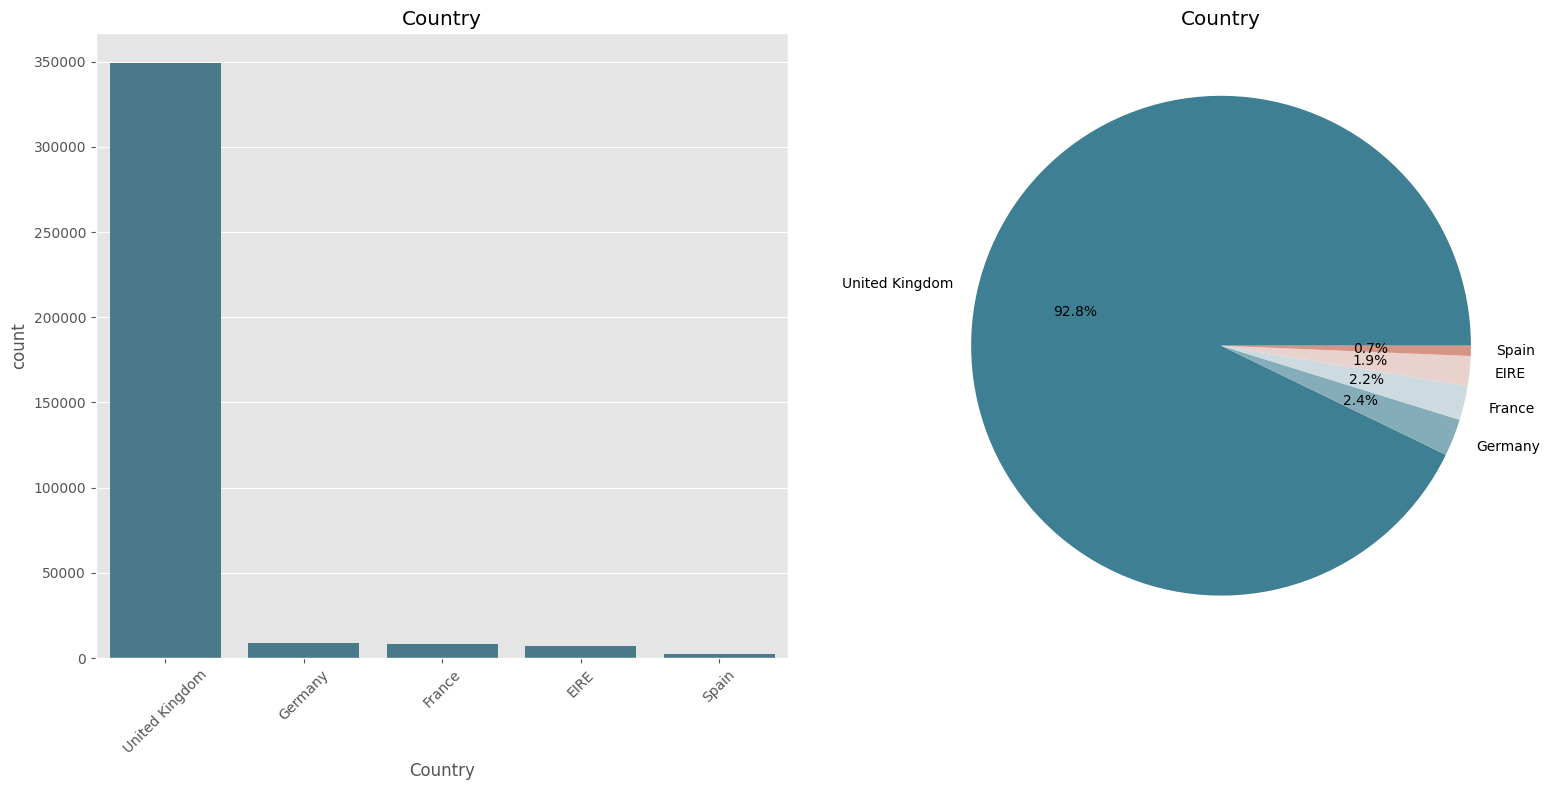

In [2129]:
single_variable_multiple_plot(df[["Country"]],numeric=False, top_n=5)

### 2.2 Outlier Analysis

**Due to the large size of the dataset, the default IQR thresholds (25th and 75th percentiles) may impact a significant portion of the data, potentially distorting the analysis. To focus exclusively on extreme outliers, the 1st and 99th percentiles of the Quantity and UnitPrice features were capped using the winsorization method.**

In [2130]:
def outlier_thresholds(dataframe:pd.DataFrame, variable:str, q1_thr:float=0.25, q3_thr:float=0.75) -> Tuple[float, float]:
    """
    Calculate the lower and upper bounds to cap outliers in a variable.

    Parameters
    ----------
    dataframe : pandas.DataFrame
        The DataFrame containing the variable.
    variable : str
        The name of the variable for which to calculate the outlier thresholds.
    q1_thr : float, optional
        The quantile value for the lower quartile. Default is 0.25.
    q3_thr : float, optional
        The quantile value for the upper quartile. Default is 0.75.

    Returns
    -------
    low_limit : float
        The lower bound threshold for capping outliers.
    up_limit : float
        The upper bound threshold for capping outliers.
    """
    quartile1 = dataframe[variable].quantile(q1_thr)
    quartile3 = dataframe[variable].quantile(q3_thr)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [2131]:
df[["Quantity","UnitPrice"]].describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,392692.0,13.119702,180.492832,1.000,2.00,6.00,12.00,80995.00
UnitPrice,392692.0,3.125914,22.241836,0.001,1.25,1.95,3.75,8142.75


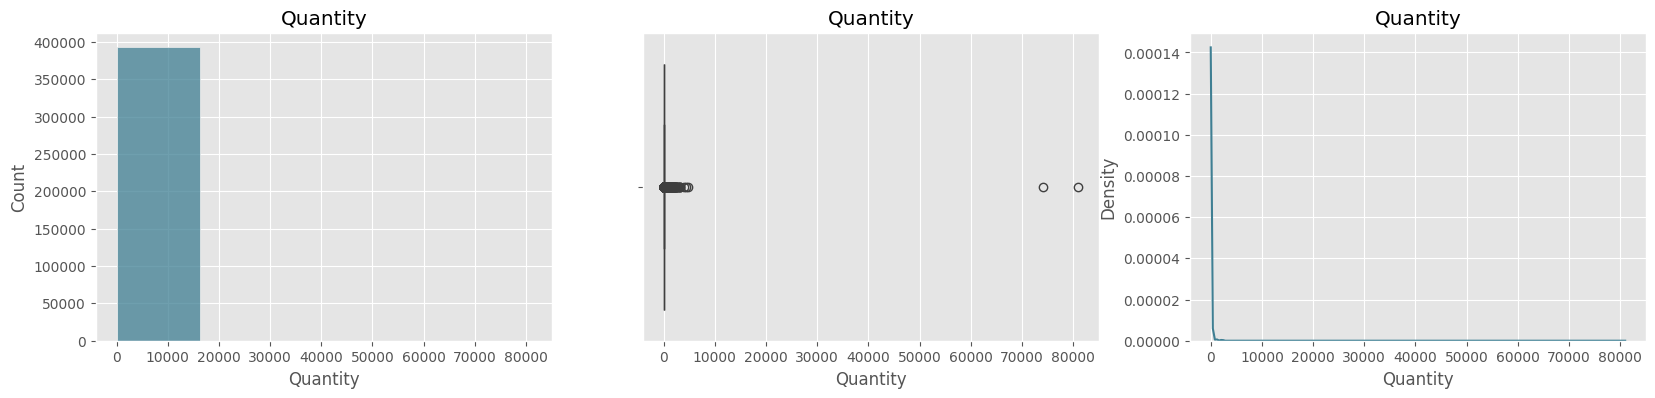

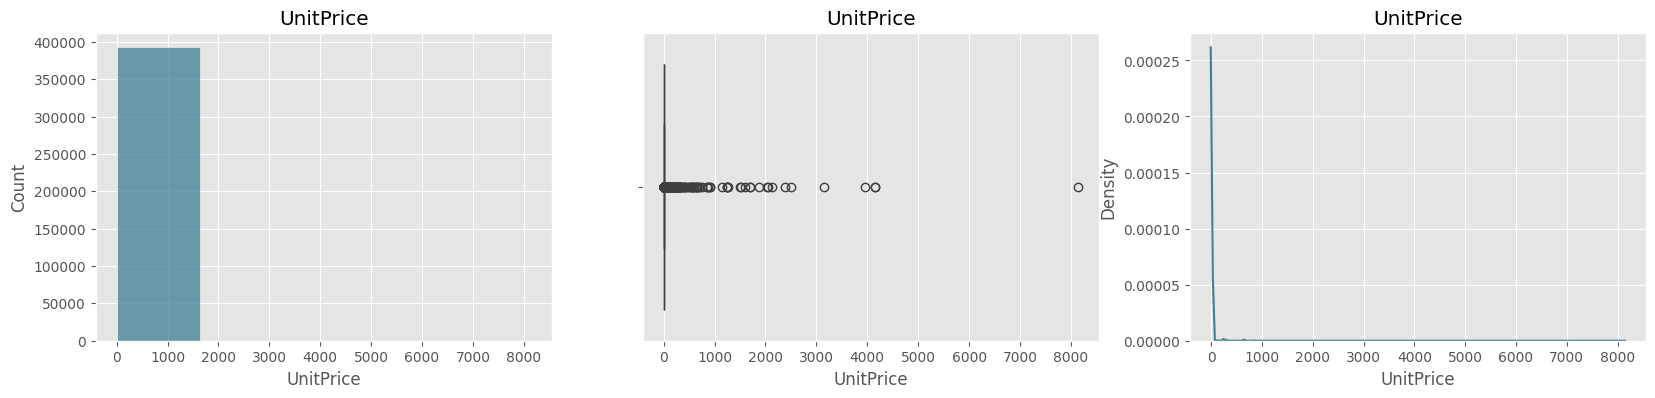

In [2132]:
single_variable_multiple_plot(df[["Quantity","UnitPrice"]])

`Quantity Variable` : 950 extreme outlier values capped to up limits

In [2133]:
low_limit, up_limit = outlier_thresholds(df,"Quantity",q1_thr=0.01, q3_thr=0.99)
df[(df["Quantity"] < low_limit) | (df["Quantity"] > up_limit)].shape

(960, 8)

In [2134]:
low_limit

np.float64(-177.5)

In [2135]:
up_limit

np.float64(298.5)

In [2136]:
df.loc[(df["Quantity"] > up_limit), "Quantity"] = up_limit

`UnitPrice Variable` : 655 extreme outlier values capped to up limits

In [2137]:
low_limit, up_limit = outlier_thresholds(df,"UnitPrice",q1_thr=0.01, q3_thr=0.99)
df[(df["UnitPrice"] < low_limit) | (df["UnitPrice"] > up_limit)].shape

(661, 8)

In [2138]:
low_limit

np.float64(-21.9)

In [2139]:
up_limit

np.float64(37.06)

In [2140]:
df.loc[(df["UnitPrice"] > up_limit), "UnitPrice"] = up_limit

### 2.4 Additional Inferences 

**Unique product count**

In [2141]:
df["Description"].nunique()

3877

In [2142]:
df["Description"].value_counts().head()

Description
WHITE HANGING HEART T-LIGHT HOLDER    2016
REGENCY CAKESTAND 3 TIER              1713
JUMBO BAG RED RETROSPOT               1615
ASSORTED COLOUR BIRD ORNAMENT         1395
PARTY BUNTING                         1389
Name: count, dtype: int64

**Unique Product Sum (Top 5)**

In [2143]:
df.groupby("Description").agg({"Quantity": "sum"}).sort_values("Quantity", ascending=False).head().reset_index()

,Description,Quantity
0,JUMBO BAG RED RETROSPOT,43249.5
1,WORLD WAR 2 GLIDERS ASSTD DESIGNS,35788.0
2,ASSORTED COLOUR BIRD ORNAMENT,31089.0
3,WHITE HANGING HEART T-LIGHT HOLDER,30986.0
4,PACK OF 72 RETROSPOT CAKE CASES,28495.0


**Unique Invoice**

In [2144]:
df["InvoiceNo"].nunique()

18532

**Adding Total Price**

In [2145]:
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]

In [2146]:
df["InvoiceDate_daily"] = df["InvoiceDate"].dt.date
df["InvoiceDate_monthly"] = df["InvoiceDate"].dt.month
df_grouped = df.groupby(["InvoiceDate_daily","InvoiceDate_monthly"])["TotalPrice"].sum().reset_index()

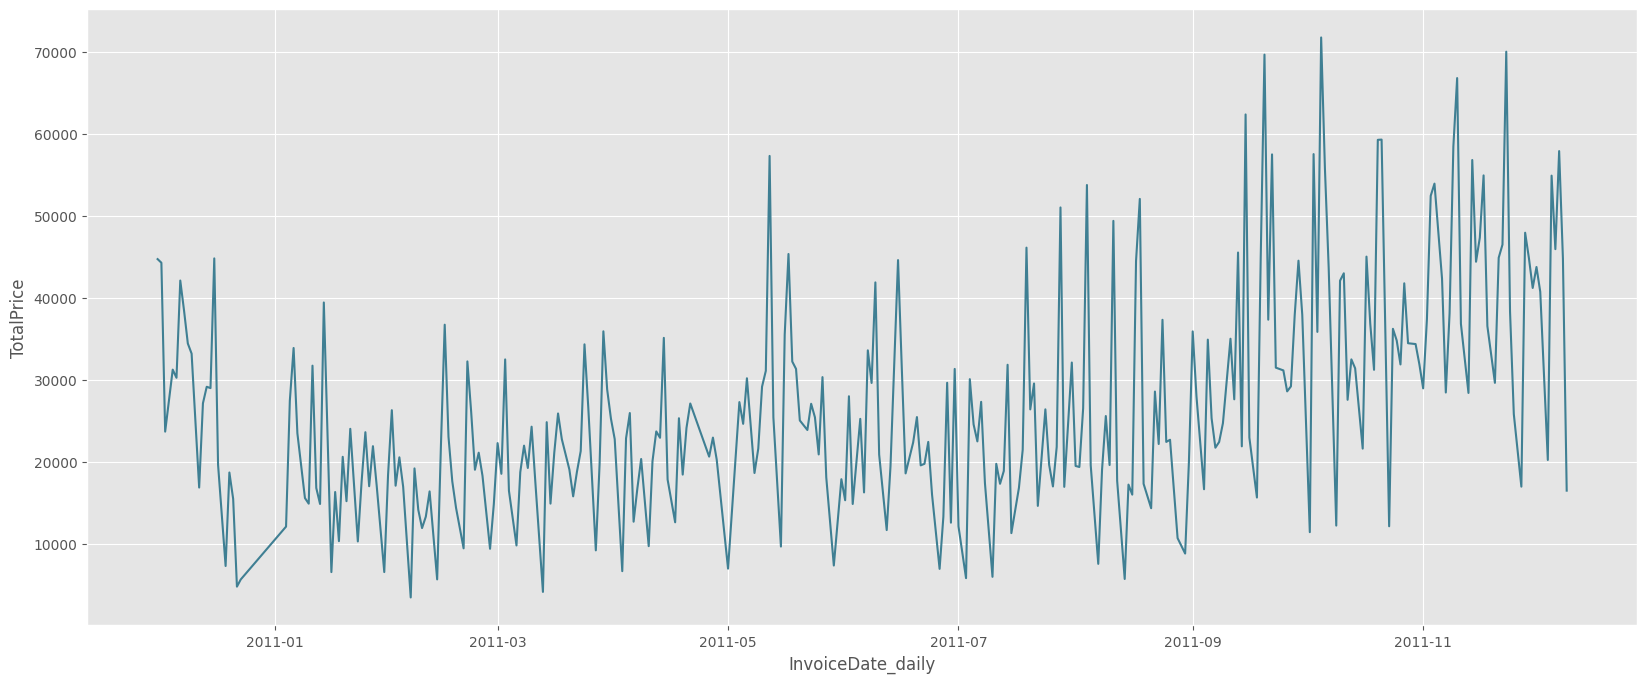

In [2147]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df_grouped, x ="InvoiceDate_daily", y= "TotalPrice")
plt.show()

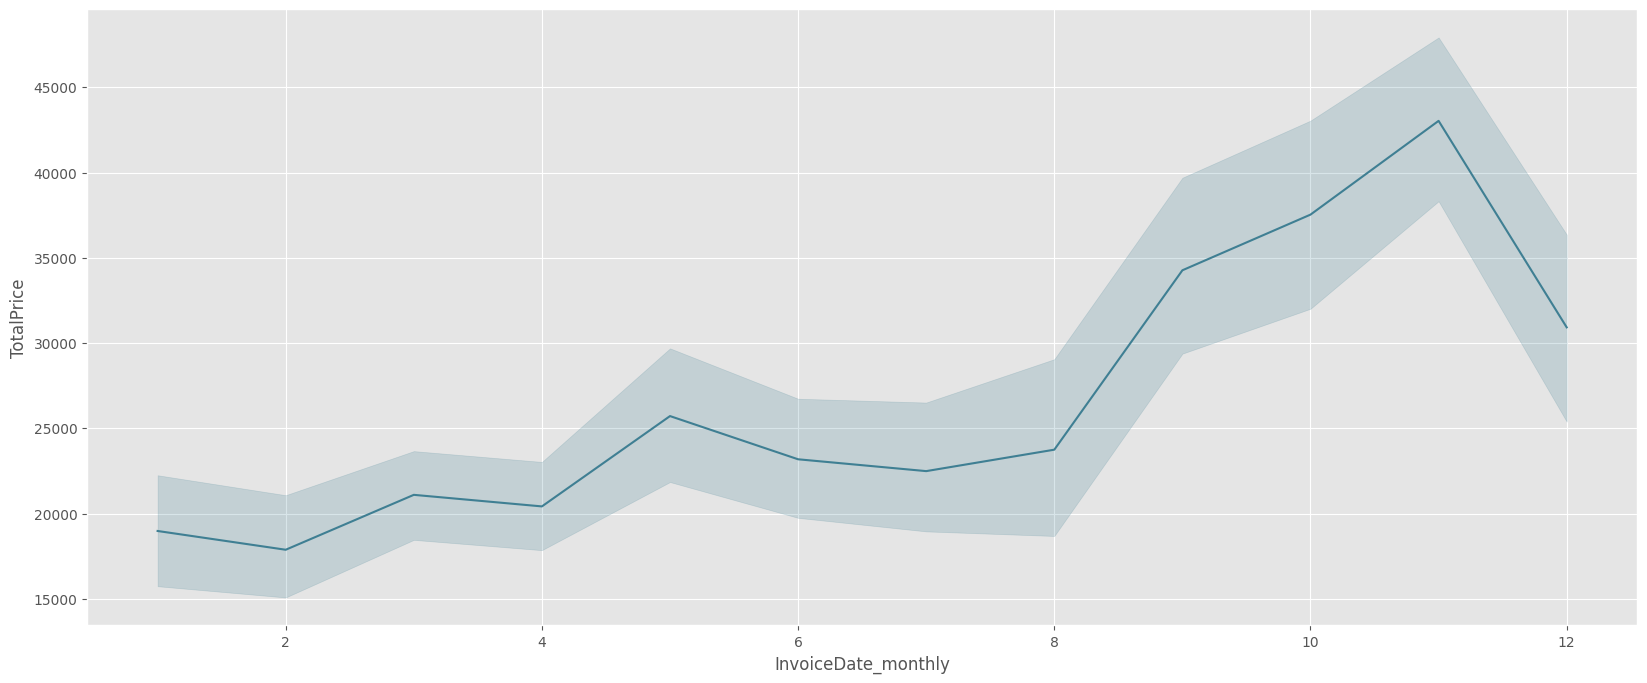

In [2148]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df_grouped, x ="InvoiceDate_monthly", y= "TotalPrice")
plt.show()

**Analyzing Purchases by Weekday**

There is no purchase in Saturdays

In [2149]:
# Extracting the day of the week from the InvoiceDate (0 = Monday, 6 = Sunday)
df["weekday"] = df["InvoiceDate"].dt.weekday
# Calculating the number of unique customers for each weekday
weekday_trends = df.groupby("weekday")["CustomerID"].nunique().reset_index(name="customercount")
weekday_trends

,weekday,customercount
0,0,1595
1,1,1701
2,2,1778
3,3,2007
4,4,1557
5,6,1225


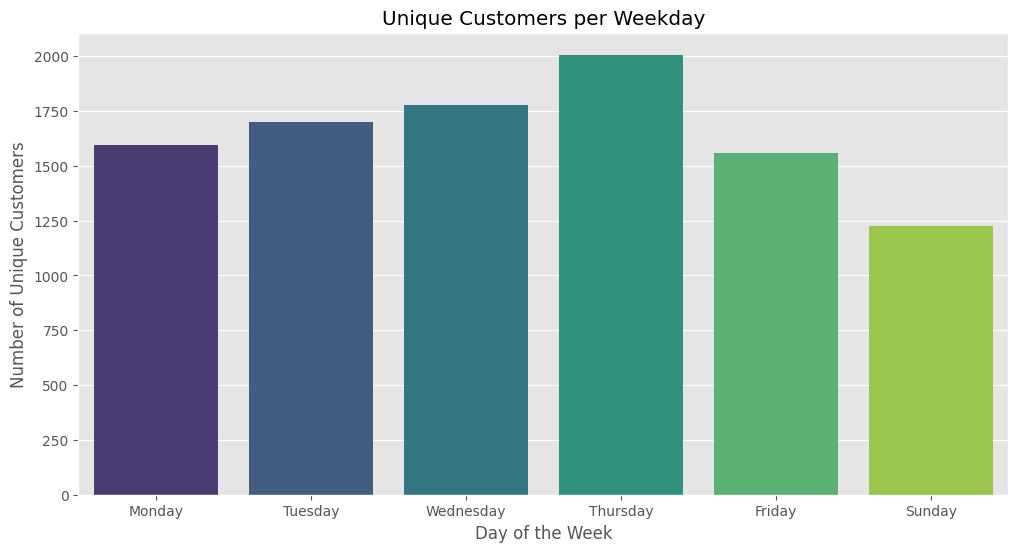

In [2150]:
plt.figure(figsize=(12, 6))
sns.barplot(data=weekday_trends, x="weekday", y="customercount", palette="viridis")
plt.xticks(ticks=range(6), labels=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Sunday"])
plt.title("Unique Customers per Weekday")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Unique Customers")
plt.show()

**Top 5 invoice by TotalPrice**

In [2151]:
df.groupby("InvoiceNo").agg({"TotalPrice": "sum"}).sort_values("TotalPrice", ascending=False).reset_index().head()

,InvoiceNo,TotalPrice
0,556917,22554.285
1,572209,22107.450
2,563614,21393.615
3,572035,19861.065
4,563076,18972.835


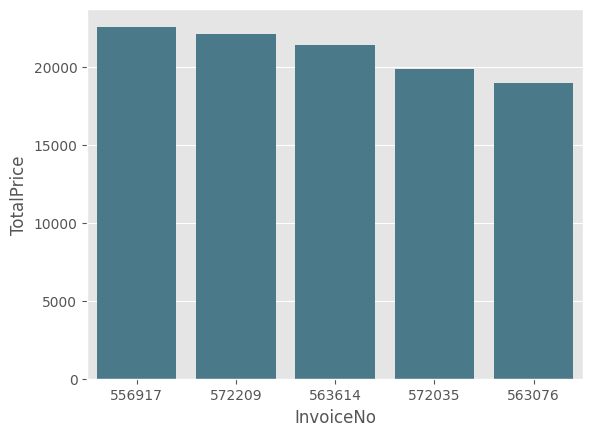

In [2152]:
top_5_invoice = df.groupby("InvoiceNo").agg({"TotalPrice": "sum"}).sort_values("TotalPrice", ascending=False).reset_index().head()
sns.barplot(data=top_5_invoice, x = "InvoiceNo", y = "TotalPrice", order=top_5_invoice["InvoiceNo"])
plt.show()

## 3. Cohord Analysis

Cohort analysis is a method of tracking and analyzing customer behavior over time by grouping them into cohorts based on shared characteristics, such as their first interaction or purchase date. In this analysis:

- Cohort Month refers to the month a customer made their first purchase.
- Cohort Index measures the number of months that have passed since the cohort was formed.
- User Count Heatmap highlights the number of unique customers retained in each month.
- Retention Rate Heatmap displays the percentage of the initial cohort that continues to engage in subsequent months.

This approach provides insights into customer retention patterns and helps evaluate the effectiveness of marketing and product strategies in maintaining long-term customer loyalty.

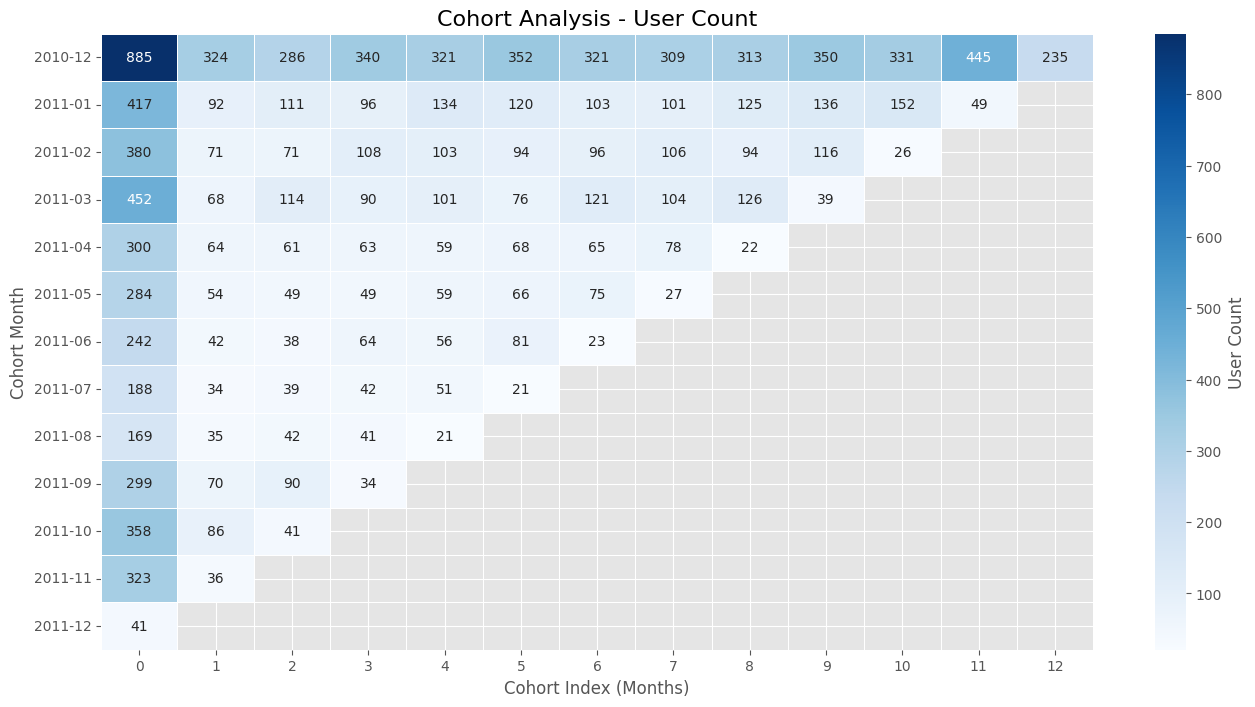

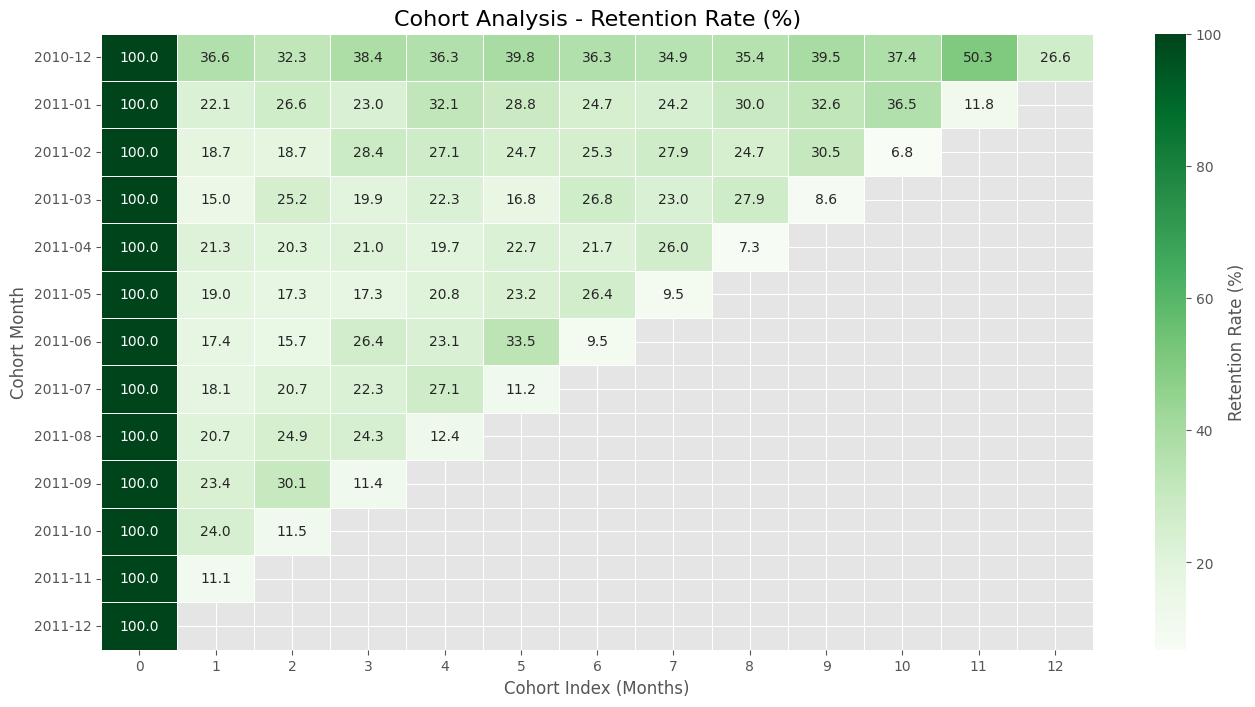

In [2153]:
# 1. Assign cohort based on the first purchase date of each customer
df["CohortMonth"] = df.groupby("CustomerID")["InvoiceDate"].transform("min").dt.to_period("M")

# 2. Identify the transaction month for each purchase
df["TransactionMonth"] = df["InvoiceDate"].dt.to_period("M")

# 3. Calculate the cohort index (number of months since first purchase)
df["CohortIndex"] = (df["TransactionMonth"] - df["CohortMonth"]).apply(lambda x: x.n)

# 4. Create a cohort table with the count of unique customers
cohort_data = df.groupby(["CohortMonth", "CohortIndex"])["CustomerID"].nunique().reset_index()
cohort_pivot = cohort_data.pivot(index="CohortMonth", columns="CohortIndex", values="CustomerID")

# 5. Calculate retention rates by dividing by the cohort size (first-month customers)
cohort_size = cohort_pivot.iloc[:, 0]  # Number of customers in the first month
retention = cohort_pivot.divide(cohort_size, axis=0) * 100  # Retention rates as percentages

# 6. Visualize the cohort table with user counts (hide 0 values)
plt.figure(figsize=(16, 8))
mask = cohort_pivot.isnull() | (cohort_pivot == 0)  # Mask for 0 and NaN values
sns.heatmap(cohort_pivot.fillna(0).astype(int), mask=mask, annot=True, fmt="d", cmap="Blues", 
            cbar_kws={"label": "User Count"}, linewidths=0.5)
plt.title("Cohort Analysis - User Count", fontsize=16)
plt.ylabel("Cohort Month", fontsize=12)
plt.xlabel("Cohort Index (Months)", fontsize=12)
plt.show()

# 7. Visualize the retention rates (hide 0 values)
plt.figure(figsize=(16, 8))
mask = retention.isnull() | (retention == 0)  # Mask for 0 and NaN values
sns.heatmap(retention.fillna(0).round(1), mask=mask, annot=True, fmt=".1f", cmap="Greens", 
            cbar_kws={"label": "Retention Rate (%)"}, linewidths=0.5)
plt.title("Cohort Analysis - Retention Rate (%)", fontsize=16)
plt.ylabel("Cohort Month", fontsize=12)
plt.xlabel("Cohort Index (Months)", fontsize=12)
plt.show()

## 4. Customer Life Time Value(CLTV) Prediction with BG-NBD and Gamma-Gamma Submodel

Customer Lifetime Value (CLTV) prediction is a key metric for businesses to understand the total revenue a customer is expected to generate during their relationship with the company. This prediction helps businesses to identify high-value customers, optimize marketing strategies, and improve customer retention. 

In this approach, **BG-NBD (Beta-Geometric/Negative Binomial Distribution)** and **Gamma-Gamma submodel** are used together to provide a probabilistic prediction of a customer's future purchases based on historical transaction data. 


### 4.1. Data Preperation

Preparing the Data Format for `BG-NBD and Gamma-Gamma Sub Model`. Creating a customized data format for users.

`recency:` Time since the last purchase. Weekly. (specific to the user)  
The recency value here represents the difference between the user's first and most recent purchase, whereas in RFM, recency refers to the difference between the current date and the most recent purchase.

`T (tenure):` Customer's age. Weekly. (How long it has been since the first purchase relative to the analysis date) In other words, it refers to how many weeks have passed since the user registered on the site and made their first purchase.

`frequency:` Total number of repeat purchases (frequency > 1). Greater than 1, because companies expect the customer to make a second purchase to be considered a customer. Also The BG-NBD model usually assumes that the customer must have made at least two purchases.

`monetary:` Average revenue per purchase. This is not the same as monetary in RFM, meaning it’s not total revenue but average revenue per purchase. The Gamma-Gamma model expects this for calculating probabilistic expected values.


In [2154]:
df["InvoiceDate"].max()

Timestamp('2011-12-09 12:50:00')

In [2155]:
snapshot_date = df["InvoiceDate"].max() + dt.timedelta(days=1)
snapshot_date

Timestamp('2011-12-10 12:50:00')

- In invoiceDate list, first value recency, second value T(tenure)
- InvoiceNo : frequency
- TotalPrice: monetary

In [2156]:
cltv_df = df.groupby("CustomerID").agg(
    {"InvoiceDate": [lambda InvoiceDate: (InvoiceDate.max() - InvoiceDate.min()).days, 
                     lambda InvoiceDate: (snapshot_date - InvoiceDate.min()).days],
     "InvoiceNo": lambda Invoice: Invoice.nunique(), 
     "TotalPrice": lambda TotalPrice: TotalPrice.sum()})

In [2157]:
cltv_df.head(1)

InvoiceDate            InvoiceNo TotalPrice
            <lambda_0> <lambda_1>  <lambda>   <lambda>
CustomerID                                            
12346.0              0        326         1     310.44

In [2158]:
cltv_df.columns = cltv_df.columns.droplevel(0)

In [2159]:
cltv_df.head(1)

,<lambda_0>,<lambda_1>,<lambda>,<lambda>
CustomerID,,,,
12346.0,0,326,1,310.44


In [2160]:
cltv_df.columns = ["recency", "T", "frequency", "monetary"]
# Avg gain per transaction
cltv_df["monetary"] = cltv_df["monetary"] / cltv_df["frequency"]
cltv_df.describe().T

,count,mean,std,min,25%,50%,75%,max
recency,4338.0,130.448594,132.039554,0.00,0.000000,92.500000,251.75000,373.00
T,4338.0,223.308207,117.886471,1.00,113.000000,249.000000,327.00000,374.00
frequency,4338.0,4.272015,7.697998,1.00,1.000000,2.000000,5.00000,209.00
monetary,4338.0,362.608673,366.949597,3.45,175.277083,286.116161,421.25875,6207.67


Recency and T values have been converted to weekly values. After the conversion process, descriptive statistics were checked, and it was observed that there was no change.

In [2161]:
# Converting recency and T into weekly values
cltv_df = cltv_df[cltv_df["frequency"] > 1]
cltv_df["recency"] = cltv_df["recency"] / 7
cltv_df["T"] = cltv_df["T"] / 7
cltv_df.describe().T

,count,mean,std,min,25%,50%,75%,max
recency,2845.0,28.415064,16.266709,0.000000,14.000000,29.571429,42.714286,53.285714
T,2845.0,36.896008,14.716660,0.428571,27.428571,40.428571,51.142857,53.428571
frequency,2845.0,5.989104,9.044247,2.000000,2.000000,4.000000,6.000000,209.000000
monetary,2845.0,370.687689,348.965107,3.450000,190.195000,298.682500,433.120000,5724.302619


### 4.2. Building the BG-NBD Model

The `BetaGeoFitter(penalizer_coef=0.001)` function creates a model object and, by using the fit method, constructs the model when the frequency, recency, and customer age values are provided. This model uses `gamma` and `beta` distributions, and the `Maximum Likelihood Estimation (MLE)` method is used to estimate the parameters.

The `penalizer_coef` argument is required during parameter estimation. It serves as the penalty coefficient used during the parameter estimation process. In other words, the BG-NBD model uses the maximum likelihood method to find the parameters of the beta and gamma distributions and then builds a model that allows us to make predictions based on these parameters.



In [2162]:
cltv_df.describe().T

,count,mean,std,min,25%,50%,75%,max
recency,2845.0,28.415064,16.266709,0.000000,14.000000,29.571429,42.714286,53.285714
T,2845.0,36.896008,14.716660,0.428571,27.428571,40.428571,51.142857,53.428571
frequency,2845.0,5.989104,9.044247,2.000000,2.000000,4.000000,6.000000,209.000000
monetary,2845.0,370.687689,348.965107,3.450000,190.195000,298.682500,433.120000,5724.302619


In [2163]:
bgf = BetaGeoFitter(penalizer_coef=0.001)
bgf.fit(cltv_df["frequency"], cltv_df["recency"], cltv_df["T"])

<lifetimes.BetaGeoFitter: fitted with 2845 subjects, a: 0.12, alpha: 11.37, b: 2.48, r: 2.18>

**Who are the top 10 customers with the highest predicted purchases within the next week?**

We specify 1 as the number of weeks for the prediction because the model has been built on a weekly basis.

In [2164]:
bgf.predict(1,cltv_df["frequency"],cltv_df["recency"], cltv_df["T"]).sort_values(ascending=False).head(10)

CustomerID
12748.0    3.251466
14911.0    3.136788
17841.0    1.946609
13089.0    1.538347
14606.0    1.468509
15311.0    1.434448
12971.0    1.361610
14646.0    1.207091
13408.0    0.986756
18102.0    0.971591
dtype: float64

In [2165]:
cltv_df["expected_purc_1_week"] = bgf.predict(1,cltv_df["frequency"],cltv_df["recency"], cltv_df["T"]).sort_values(ascending=False)

**Who are the top 10 customers with the highest predicted purchases within the next month?**

This time We specify 4 for 1 month

In [2166]:
bgf.predict(4,cltv_df["frequency"],cltv_df["recency"], cltv_df["T"]).sort_values(ascending=False).head(10)

CustomerID
12748.0    12.971488
14911.0    12.513915
17841.0     7.765774
13089.0     6.136932
14606.0     5.858428
15311.0     5.722576
12971.0     5.431927
14646.0     4.814996
13408.0     3.936528
18102.0     3.875870
dtype: float64

In [2167]:
cltv_df["expected_purc_1_month"] = bgf.predict(4,cltv_df["frequency"],cltv_df["recency"], cltv_df["T"]).sort_values(ascending=False)

**By summing all the incoming values, we can find the expected number of sales for the company over a 1-month period.**

In [2168]:
bgf.predict(4, cltv_df["frequency"], cltv_df["recency"], cltv_df["T"]).sum()

np.float64(1783.9903386403203)

**Expected number of sales for the company over a 3-month period**

In [2169]:
bgf.predict(4 * 3, cltv_df["frequency"], cltv_df["recency"], cltv_df["T"]).sum()

np.float64(5292.6272300371365)

In [2170]:
cltv_df["expected_purc_3_month"] = bgf.predict(4 * 3, cltv_df["frequency"], cltv_df["recency"], cltv_df["T"]).sum()

**Analysing Prediction Results**

The prediction accuracy is good in some areas, but in certain places, such as in point 2, it seems off.


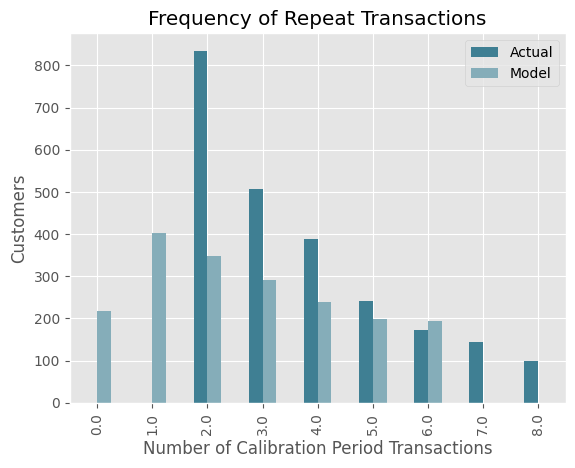

In [2171]:
plot_period_transactions(bgf)
plt.show()

### 4.3. Building the GAMMA-GAMMA Model

The BG-NBD models the purchase frequency, while the Gamma-Gamma models the average profit per transaction.

It takes the frequency and monetary values as inputs.


In [2172]:
ggf = GammaGammaFitter(penalizer_coef=0.01)

In [2173]:
ggf.fit(cltv_df["frequency"], cltv_df["monetary"])

<lifetimes.GammaGammaFitter: fitted with 2845 subjects, p: 3.80, q: 0.34, v: 3.73>

**We modeled the purchase frequency with BG-NBD, and now we are trying to model the average profit using the GAMMA-GAMMA model. In other words, the average net profit.**

In [2174]:
ggf.conditional_expected_average_profit(cltv_df["frequency"], cltv_df["monetary"]).sort_values(ascending=False).head(10)

CustomerID
12415.0    5772.114754
12590.0    5028.789729
12435.0    4288.406992
12409.0    3918.495765
14088.0    3917.059881
18102.0    3870.982134
12753.0    3678.433982
14646.0    3654.803337
15749.0    3215.792247
14096.0    3196.392631
dtype: float64

In [2175]:
cltv_df["expected_average_profit"] = ggf.conditional_expected_average_profit(cltv_df["frequency"], cltv_df["monetary"])

**There is valuable information in the table that allows us to identify potential customers.**



In [2176]:
cltv_df.sort_values("expected_average_profit", ascending=False).head(10)

,recency,T,frequency,monetary,expected_purc_1_week,expected_purc_1_month,expected_purc_3_month,expected_average_profit
CustomerID,,,,,,,,
12415.0,44.714286,48.285714,21,5724.302619,0.379889,1.515112,5292.62723,5772.114754
12590.0,0.000000,30.142857,2,4591.172500,0.011777,0.046895,5292.62723,5028.789729
12435.0,26.857143,38.285714,2,3914.945000,0.076391,0.304393,5292.62723,4288.406992
12409.0,14.714286,26.142857,3,3690.890000,0.117655,0.468309,5292.62723,3918.495765
14088.0,44.571429,46.000000,13,3864.554615,0.261211,1.041630,5292.62723,3917.059881
18102.0,52.285714,52.428571,60,3859.739083,0.971591,3.875870,5292.62723,3870.982134
12753.0,48.428571,51.857143,6,3571.565000,0.126123,0.503039,5292.62723,3678.433982
14646.0,50.428571,50.714286,73,3646.075685,1.207091,4.814996,5292.62723,3654.803337
15749.0,13.857143,47.428571,3,3028.780000,0.028470,0.113515,5292.62723,3215.792247


### 4.4. CLTV calculation with BG-NBD and GAMMA-GAMMA models

The **CLTV (Customer Lifetime Value)** represents the predicted total revenue a customer will generate over a specific period. In this case, the model estimates the total expected revenue for **3 months**, using a **weekly time scale** (`freq="W"`). The calculation incorporates:

- **Frequency**: Number of repeat purchases.  
- **Recency**: Time since the last purchase (in weeks).  
- **T**: Customer's age (time since the first purchase, in weeks).  
- **Monetary**: Average revenue per transaction.

The output shows how much revenue each customer is expected to contribute in the next 3 months.


**customer_lifetime_value Parameters:**

### customer_lifetime_value Parameters

- **`transaction_prediction_model`**:  
  - **Type**: Model object.  
  - **Description**: The model used to predict future transactions. Typically, Pareto/NBD or BG-NBD models are used, but other models can also be utilized.  

- **`frequency`**:  
  - **Type**: Array-like.  
  - **Description**: The frequency vector representing the number of purchases made by customers (denoted as **x** in the literature).  

- **`recency`**:  
  - **Type**: Array-like.  
  - **Description**: The recency vector representing the time since the last purchase (denoted as **t_x** in the literature).  

- **`T`**:  
  - **Type**: Array-like.  
  - **Description**: The customer's age, representing the time since the first purchase (denoted as **T** in the literature).  

- **`monetary_value`**:  
  - **Type**: Array-like.  
  - **Description**: The average monetary value of a customer’s purchases (denoted as **m** in the literature).  

- **`time`**:  
  - **Type**: Float, optional.  
  - **Description**: The lifetime expected for the customer, expressed in **months**. Default is 12 months.  

- **`discount_rate`**:  
  - **Type**: Float, optional.  
  - **Description**: The monthly discount rate applied to adjust for the time value of money. Default is 0.01 (1%).  

- **`freq`**:  
  - **Type**: String, optional.  
  - **Description**: Indicates the time unit of **T** and other time-related values. Accepted values are:
    - **`"D"`**: Day  
    - **`"W"`**: Week  
    - **`"M"`**: Month  
    - **`"Y"`**: Year  






In [2177]:
cltv = ggf.customer_lifetime_value(bgf,
                                   cltv_df["frequency"],
                                   cltv_df["recency"],
                                   cltv_df["T"],
                                   cltv_df["monetary"],
                                   time=3,  
                                   freq="W",  
                                   discount_rate=0.01)
cltv = cltv.reset_index()
cltv.head()

,CustomerID,clv
0,12347.0,1131.885034
1,12348.0,541.024294
2,12352.0,517.983383
3,12356.0,1083.640587
4,12358.0,967.517121


In [2178]:
cltv_final = cltv_df.merge(cltv, on="CustomerID", how="left")

In [2179]:
cltv_final.sort_values(by="clv", ascending=False).head(10)

,CustomerID,recency,T,frequency,monetary,expected_purc_1_week,expected_purc_1_month,expected_purc_3_month,expected_average_profit,clv
1122,14646.0,50.428571,50.714286,73,3646.075685,1.207091,4.814996,5292.62723,3654.803337,55782.071859
2761,18102.0,52.285714,52.428571,60,3859.739083,0.971591,3.875870,5292.62723,3870.982134,47566.784980
843,14096.0,13.857143,14.571429,17,3163.588235,0.729735,2.899941,5292.62723,3196.392631,29111.204122
36,12415.0,44.714286,48.285714,21,5724.302619,0.379889,1.515112,5292.62723,5772.114754,27709.859508
1257,14911.0,53.142857,53.285714,201,691.143483,3.136788,12.513915,5292.62723,691.758479,27448.631581
2458,17450.0,51.285714,52.571429,46,2859.796630,0.747889,2.983473,5292.62723,2870.692935,27153.202948
874,14156.0,51.571429,53.142857,55,2100.944000,0.878060,3.502851,5292.62723,2107.652963,23408.067142
2487,17511.0,52.857143,53.428571,31,2933.943065,0.509106,2.030966,5292.62723,2950.558256,18999.551174
2075,16684.0,50.428571,51.142857,28,2209.969107,0.479616,1.913130,5292.62723,2223.866720,13485.726886
650,13694.0,52.714286,53.428571,50,1275.700500,0.801271,3.196544,5292.62723,1280.212403,12975.313849


**Table Interpretation**

In the first 10 customers, how is it that those with higher recency values (e.g., 50, 52) exhibit the highest CLV values?  
This observation touches on one of the critical aspects of BG-NBD theory. Traditionally, we may assume that lower recency implies a better customer because it indicates a more recent purchase. However, the `"Buy Till You Die"` concept argues differently:  

> **If a customer with consistent purchase behavior has not churned or dropped out, their likelihood of making a purchase increases as their recency grows.**  

This means that as **recency increases**, the probability of a purchase also rises, indicating the customer is close to their next transaction. After making a purchase, a customer might go through a partial churn phase and remain inactive for a while. Over time, their need to buy resurfaces.  

Thus, when recency and customer age values are both high and similar, it suggests a pattern where customers are still active and likely to make purchases soon. Other factors like **frequency** and **monetary value** further validate these observations.  

---

**Examples from the Table:**

- **CustomerID 843**:  
  This customer has relatively low frequency (13.86) and customer age (14.57), but their recency is close to their age, indicating consistent purchasing behavior. Additionally, their **monetary value** is high (3163.59), showing potential for profitability.  

- **CustomerID 1257**:  
  This customer is older, with high frequency (201) but a low monetary value (691.14). Despite contributing less per transaction, their high frequency compensates, making them valuable in terms of engagement.  

- **CustomerID 650**:  
  A customer with a high recency (52.71) and customer age (53.42), indicating near-regular activity. Their CLV reflects balanced contributions.  

---

**Key Insights:**

1. **High Recency ≠ Churn**:  
   Customers with high recency and consistent behavioral patterns are often closer to their next purchase.  

2. **Capturing Both Potential and Current Value**:  
   The model identifies both high-value older customers and newer customers with high potential. For example:
   - Older customer with low profitability but high frequency.  
   - Newer customer with low frequency but high monetary value.  

3. **Holistic Perspective**:  
   Unlike segmentation based solely on frequency or monetary value, the BG-NBD and Gamma-Gamma models capture a more comprehensive picture. This avoids oversights like focusing on monetary value while neglecting consistent buyers or vice versa.  

This ability to capture nuanced customer behavior and potential makes these models highly valuable for strategic decision-making.

---


### 4.5. Creation of CLTV Segments 

**Strategic Insights from CLV Analysis**

By calculating the average revenue expected from each customer, we’ve also determined the total average revenue expected from all customers. This allows us to make data-driven comparisons between the cost of acquiring new customers and the value of existing ones.  

For instance, if we know the **cost of acquiring a new customer** is 30 units and the **revenue from existing customers over a 6-month period** is 50 units, we can decide how to allocate resources more effectively. In this scenario:
- It might be more logical to focus on existing customers rather than acquiring new ones.  
- Conversely, if the revenue from new customers is higher, focusing on customer acquisition might be the better strategy.


**CLV-Based Segmentation**

After calculating CLV values, it may also be beneficial to group customers into segments. Not all customers have the same lifetime value, and segmentation helps prioritize efforts. For example:
- **D Segment**: Average CLV is **143**, with 711 customers, and an average purchase frequency of 3.  
- **A Segment**: Average CLV is **2000** with fewer customers but higher individual value.  

In cases of limited resources, targeting high-value segments with tailored strategies can yield better results, ensuring efficient allocation of effort and investment.


In [2180]:
cltv_final
cltv_final["clv_segment"] = pd.qcut(cltv_final["clv"], 4, labels=["D", "C", "B", "A"])
cltv_final.sort_values(by="clv", ascending=False).head(50)
cltv_final.groupby("clv_segment").agg(
    {"count", "mean", "sum"})

CustomerID                      recency                      \
                     mean count         sum       mean count           sum   
clv_segment                                                                  
D            15547.252809   712  11069644.0  22.214888   712  15817.000000   
C            15328.165963   711  10898326.0  30.621258   711  21771.714286   
B            15354.524613   711  10917067.0  29.333936   711  20856.428571   
A            14938.360056   711  10621174.0  31.498895   711  22395.714286   

                     T                      frequency                monetary  \
                  mean count           sum       mean count   sum        mean   
clv_segment                                                                     
D            40.446629   712  28798.000000   3.068820   712  2185  182.587282   
C            38.007233   711  27023.142857   4.099859   711  2915  269.500625   
B            34.616637   711  24612.428571   5.427567   711  3859  372.549832   
A            34.508539   711  24535.571429  11.364276   711  8080  658.377574   

                                 expected_purc_1_week                    \
            count            sum                 mean count         sum   
clv_segment                                                               
D             712  130002.144529             0.071530   712   50.929373   
C             711  191614.944404             0.121442   711   86.345371   
B             711  264882.930452             0.163017   711  115.905103   
A             711  468106.454890             0.274141   711  194.914566   

            expected_purc_1_month                   expected_purc_3_month  \
                             mean count         sum                  mean   
clv_segment                                                                 
D                        0.284885   712  202.837926            5292.62723   
C                        0.483615   711  343.850162            5292.62723   
B                        0.648780   711  461.282641            5292.62723   
A                        1.091448   711  776.019609            5292.62723   

                                expected_average_profit                       \
            count           sum                    mean count            sum   
clv_segment                                                                    
D             712  3.768351e+06              197.947820   712  140938.847709   
C             711  3.763058e+06              287.600657   711  204484.066975   
B             711  3.763058e+06              392.983998   711  279411.622546   
A             711  3.763058e+06              684.296555   711  486534.850543   

                     clv                      
                    mean count           sum  
clv_segment                                   
D             143.148315   712  1.019216e+05  
C             380.293876   711  2.703889e+05  
B             687.844840   711  4.890577e+05  
A            2223.495475   711  1.580905e+06

In [2181]:
cltv_final.head()

,CustomerID,recency,T,frequency,monetary,expected_purc_1_week,expected_purc_1_month,expected_purc_3_month,expected_average_profit,clv,clv_segment
0,12347.0,52.142857,52.428571,7,615.714286,0.141701,0.565200,5292.62723,631.891318,1131.885034,A
1,12348.0,40.285714,51.142857,4,442.695000,0.092339,0.368260,5292.62723,463.718601,541.024294,B
2,12352.0,37.142857,42.428571,8,219.542500,0.182538,0.727724,5292.62723,224.880381,517.983383,B
3,12356.0,43.142857,46.571429,3,937.143333,0.086201,0.343688,5292.62723,995.918744,1083.640587,A
4,12358.0,21.285714,21.571429,2,575.210000,0.122352,0.486634,5292.62723,631.823757,967.517121,A


**selected CLTV features merged with main df**

In [2182]:
new_clv_features = ["CustomerID","expected_average_profit","clv","clv_segment"]
df = df.merge(cltv_final[new_clv_features], on="CustomerID", how= "left")

> **The CustomerID count dropped to 2,835 after eliminating customers with a purchase frequency of 1. To ensure no data is lost, these 1-frequency customers will be labeled as the 'F' category, and their CLV and expected_average_profit values will be set to 0**

In [2183]:
df["CustomerID"].nunique()

4338

In [2184]:
cltv_final["CustomerID"].nunique()

2845

In [2185]:
df.isnull().sum()

InvoiceNo                      0
StockCode                      0
Description                    0
Quantity                       0
InvoiceDate                    0
UnitPrice                      0
CustomerID                     0
Country                        0
TotalPrice                     0
InvoiceDate_daily              0
InvoiceDate_monthly            0
weekday                        0
CohortMonth                    0
TransactionMonth               0
CohortIndex                    0
expected_average_profit    32898
clv                        32898
clv_segment                32898
dtype: int64

In [2186]:
cltv_final["clv_segment"].dtypes

CategoricalDtype(categories=['D', 'C', 'B', 'A'], ordered=True, categories_dtype=object)

In [2187]:
df["clv"].fillna(0, inplace=True)
df["expected_average_profit"].fillna(0, inplace=True)

In [2188]:
df["clv_segment"] = df["clv_segment"].cat.add_categories("F")
df["clv_segment"].fillna("F", inplace=True)
df["clv_segment"] = df["clv_segment"].cat.reorder_categories(["F", "D", "C", "B", "A"], ordered=True)

In [2189]:
df["clv_segment"].dtypes

CategoricalDtype(categories=['F', 'D', 'C', 'B', 'A'], ordered=True, categories_dtype=object)

In [2190]:
df.isnull().sum()

InvoiceNo                  0
StockCode                  0
Description                0
Quantity                   0
InvoiceDate                0
UnitPrice                  0
CustomerID                 0
Country                    0
TotalPrice                 0
InvoiceDate_daily          0
InvoiceDate_monthly        0
weekday                    0
CohortMonth                0
TransactionMonth           0
CohortIndex                0
expected_average_profit    0
clv                        0
clv_segment                0
dtype: int64

In [2191]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,InvoiceDate_daily,InvoiceDate_monthly,weekday,CohortMonth,TransactionMonth,CohortIndex,expected_average_profit,clv,clv_segment
0,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,298.5,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,310.44,2011-01-18,1,1,2011-01,2011-01,0,0.000000,0.000000,F
1,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12.0,2010-12-07 14:57:00,2.10,12347.0,Iceland,25.20,2010-12-07,12,1,2010-12,2010-12,0,631.891318,1131.885034,A
2,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4.0,2010-12-07 14:57:00,4.25,12347.0,Iceland,17.00,2010-12-07,12,1,2010-12,2010-12,0,631.891318,1131.885034,A
3,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12.0,2010-12-07 14:57:00,3.25,12347.0,Iceland,39.00,2010-12-07,12,1,2010-12,2010-12,0,631.891318,1131.885034,A
4,537626,22492,MINI PAINT SET VINTAGE,36.0,2010-12-07 14:57:00,0.65,12347.0,Iceland,23.40,2010-12-07,12,1,2010-12,2010-12,0,631.891318,1131.885034,A


## 5. RFM Analysis

RFM (Recency, Frequency, Monetary) analysis is a powerful method used to segment customers based on their transaction history. By evaluating how recently a customer has made a purchase (Recency), how often they make purchases (Frequency), and how much money they spend (Monetary), businesses can identify high-value customers and tailor their marketing efforts. RFM analysis helps in targeting the right customers for retention, loyalty programs, and personalized offers, ultimately improving customer satisfaction and boosting sales.


### 5.1. Calculating RFM Metrics

**Determining the Snapshot Date**

The general practice for determining the snapshot date for a dataset is to add 1 day to the dataset's maximum date

In [2192]:
df["InvoiceDate"].max()

Timestamp('2011-12-09 12:50:00')

In [2193]:
snapshot_date = df["InvoiceDate"].max() + dt.timedelta(days=1)
snapshot_date

Timestamp('2011-12-10 12:50:00')

In [2194]:
rfm = df.groupby("CustomerID").agg({"InvoiceDate": lambda InvoiceDate: (snapshot_date - InvoiceDate.max()).days,
                                    "InvoiceNo": lambda Invoice: Invoice.nunique(),
                                    "TotalPrice": lambda TotalPrice: TotalPrice.sum()}).reset_index()
rfm.columns = ["CustomerID","recency", "frequency", "monetary"]
rfm.head()

,CustomerID,recency,frequency,monetary
0,12346.0,326,1,310.44
1,12347.0,2,7,4310.00
2,12348.0,75,4,1770.78
3,12349.0,19,1,1491.72
4,12350.0,310,1,331.46


In [2195]:
rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4338.0,15300.408022,1721.808492,12346.00,13813.250,15299.500,16778.75,18287.000
recency,4338.0,92.536422,100.014169,1.00,18.000,51.000,142.00,374.000
frequency,4338.0,4.272015,7.697998,1.00,1.000,2.000,5.00,209.000
monetary,4338.0,1886.652564,7701.957233,3.75,302.125,657.265,1625.53,266163.525


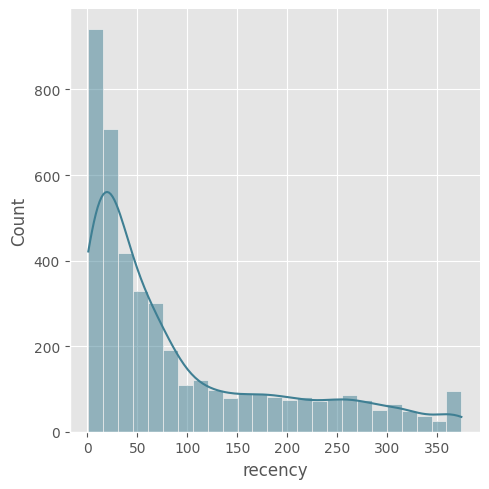

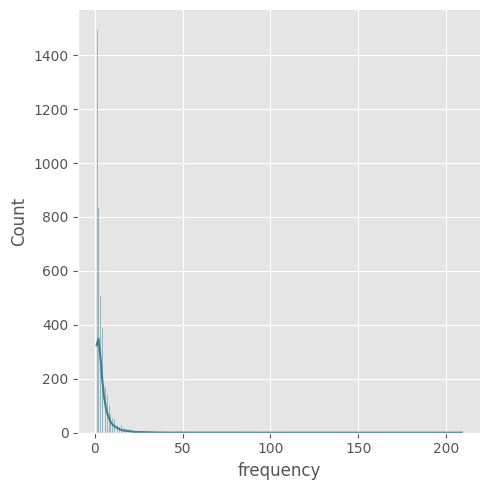

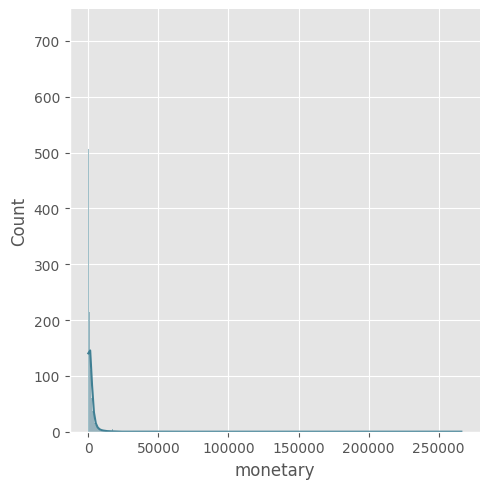

In [2196]:
sns.displot(rfm["recency"], kde = True)
plt.show()

sns.displot(rfm["frequency"],kde = True)
plt.show()

sns.displot(rfm["monetary"],kde = True)
plt.show()

### 5.2. Calculating RFM Scores

The quantile cut method has been applied to the RFM metrics to assign scores to the continuous variables. For Monetary and Frequency, higher scores indicate higher values, while for Recency, lower scores represent higher values. Due to this, the labels for Recency were reversed to maintain consistency in the scoring scale

In [2197]:
rfm["recency_score"] = pd.qcut(rfm['recency'], 5, labels=[5, 4, 3, 2, 1])


Since there are duplicate values in the 'frequency' column, rank() is used to assign a ranking to each value. The 'method="first"' option ensures that the tie-breaking for equal values is done based on their order in the dataset. After ranking, the values are divided into 5 equal bins using qcut, and categorical scores are assigned.

In [2198]:
rfm["frequency_score"] = pd.qcut(rfm['frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])

In [2199]:
rfm["monetary_score"] = pd.qcut(rfm["monetary"], 5, labels=[1, 2, 3, 4, 5])

In [2200]:
rfm["RFM_score"] = (rfm['recency_score'].astype(str) +
                    rfm['frequency_score'].astype(str)+
                    rfm['monetary_score'].astype(str))

### 5.3. Customer Segmentation due to RFM Scores

**Two-dimensional RFM Matrix**  
In this method, a matrix is created between the customers' last purchase dates and their purchase frequencies. This matrix is used to segment customers into different groups. The **Monetary** value is not taken into account. The customer's monetary return is not a priority in this dataset (depending on the industry). The primary focus is on acquiring loyal customers with high Recency and Frequency values. Once loyal customers are acquired, their Monetary value will increase.  

Segments are generally ranked as follows, with the **Champions** class being the most valuable customers:

1. **Hibernating** - Customers who have been inactive for a long time.  
2. **At Risk** - Customers with a high risk of being lost.  
3. **Can't Lose** - Customers whose loss would significantly impact the business.  
4. **About to Sleep** - Customers who are likely to become inactive soon.  
5. **Need Attention** - Customers requiring special care to build loyalty.  
6. **Loyal Customers** - Customers with a consistent and long-term relationship with the brand.  
7. **Promising** - Customers who may become valuable in the future.  
8. **New Customers** - Customers who recently started engaging with the brand.  
9. **Potential Loyalist** - Customers with the potential to become loyal.  
10. **Champions** - The best customers who frequently engage and bring the highest value.  



In [2201]:
segment_map = {
    r"[1-2][1-2]": "hibernating",
    r"[1-2][3-4]": "at_risk",
    r"[1-2]5": "cant_loose",
    r"3[1-2]": "about_to_sleep",
    r"33": "need_attention",
    r"[3-4][4-5]": "loyal_customers",
    r"41": "promising",
    r"51": "new_customers",
    r"[4-5][2-3]": "potential_loyalists",
    r"5[4-5]": "champions"
}

rfm["customer_segment"] = rfm['recency_score'].astype(str) + rfm['frequency_score'].astype(str)
rfm["customer_segment"] = rfm["customer_segment"].replace(segment_map, regex=True)
rfm.head()


,CustomerID,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_score,customer_segment
0,12346.0,326,1,310.44,1,1,2,112,hibernating
1,12347.0,2,7,4310.00,5,5,5,555,champions
2,12348.0,75,4,1770.78,2,4,4,244,at_risk
3,12349.0,19,1,1491.72,4,1,4,414,promising
4,12350.0,310,1,331.46,1,1,2,112,hibernating


**Statistics of customer segments due to recency, frequency, monetary values**

**What this gives us:**
- It helps to understand the average behavior of customers in each segment for Recency, Frequency, and Monetary values.
  
- It also shows the size of each segment (how many customers belong to each segment).

- Based on the table, we can design win-back campaigns targeting customers with low frequency and high monetary value

In [2202]:
rfm[["customer_segment", "recency", "frequency", "monetary"]].groupby("customer_segment").agg(["mean", "count"])

recency        frequency           monetary      
                           mean count       mean count         mean count
customer_segment                                                         
about_to_sleep        53.504274   351   1.162393   351   456.086325   351
at_risk              155.062069   580   2.863793   580   924.367855   580
cant_loose           132.428571    63   8.380952    63  2640.768095    63
champions              5.876777   633  12.413902   633  6483.838017   633
hibernating          217.897653  1065   1.101408  1065   396.109758  1065
loyal_customers       33.469166   827   6.458283   827  2737.371422   827
need_attention        53.064516   186   2.327957   186   834.945672   186
new_customers          6.857143    42   1.000000    42   311.693214    42
potential_loyalists   17.123984   492   2.010163   492   669.118750   492
promising             23.444444    99   1.000000    99   345.260808    99

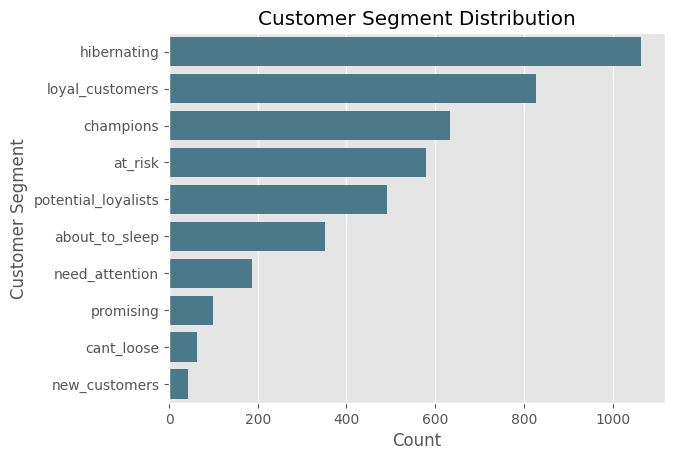

In [2203]:
sns.countplot(y="customer_segment", data=rfm, order = rfm["customer_segment"].value_counts().index)
plt.title("Customer Segment Distribution")
plt.xlabel("Count")
plt.ylabel("Customer Segment")
plt.show()

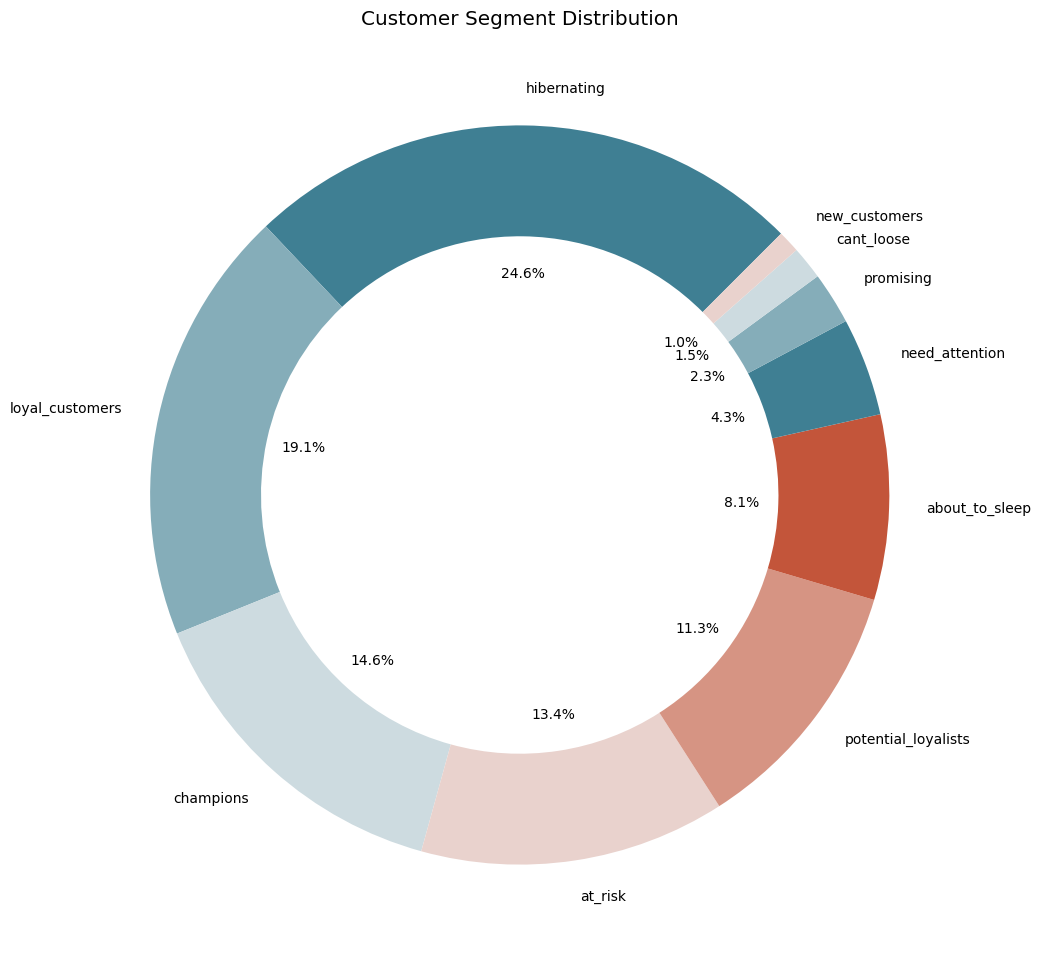

In [2204]:
segment_counts = rfm["customer_segment"].value_counts()
plt.figure(figsize=(12,12))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=45, wedgeprops=dict(width=0.3))
plt.title("Customer Segment Distribution")
plt.show()

**Analysis Summary:**

The largest group of customers, 24%, falls under the *hibernating* category. This group has the highest recency values, but the lowest frequency and monetary values.  
The second-largest group, 19%, consists of *loyal_customers*.  
The 3rd and 4th largest groups, each at 14%, are *champions* and *at_risk* customers.  
In 5th place, with 11%, are the *potential_loyalists*.  

From this, we can identify which customers to reward, which ones we cannot afford to lose, and which ones we need to engage with more actively. 

- `Hibernating`: This group has the highest percentage. They stand out due to high recency and low frequency values, indicating that they made purchases a long time ago. Given their high numbers, as shown in the visualizations and the analysis, reaching out to these customers should be the top priority.
  
- `At Risk`: These customers have not made purchases in a long time (high recency, low frequency). Special campaigns targeted at this group can help bring them back to the brand. Their numbers are significant and should not be overlooked.

- `Loyal Customers & Champions`: These are the brand's loyal customers, with low recency (recent purchases) and high frequency (multiple transactions). Special offers, such as exclusive coupons, can be designed to reward their loyalty. However, *Loyal Customers* should take priority, as the *Champions* group is already actively engaged with the brand.

- `Potential Loyalists`: This group stands out due to low recency values. This can be leveraged by creating special campaigns and discounts to encourage repeat purchases.

- `New Customers`: They belong to the lowest segment. To attract more new customers, marketing efforts such as advertisements, seminars, or promotions can be focused on this group.


**Zoom in `cant_loose` category**

In [2205]:
rfm[rfm["customer_segment"] == "cant_loose"].head()

,CustomerID,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_score,customer_segment
241,12643.0,128,6,2942.265,2,5,5,255,cant_loose
400,12853.0,135,6,1957.100,2,5,4,254,cant_loose
410,12868.0,186,6,1607.060,1,5,4,154,cant_loose
464,12947.0,144,6,1548.110,2,5,4,254,cant_loose
485,12980.0,158,9,7374.900,2,5,5,255,cant_loose


**If the sales department asks us which customers are in the `cant_loose` category. We can easly provide them with the customer IDs.**

In [2206]:
rfm.loc[rfm["customer_segment"] == "cant_loose","CustomerID"].to_list()[:5]

[12643.0, 12853.0, 12868.0, 12947.0, 12980.0]

### 5.4. Advanced Segmentation with KMeans Clustering Algorithm

Before applying the `KMeans` algorithm, the numerical values are extracted and scaled for better results. Then, the optimal number of clusters is determined using the `elbow method`. In this method, the point where the graph forms an "elbow" is observed. Based on this, the optimal number of clusters for this dataset is determined as`n_clusters = 4`.

In [2207]:
feature_list = rfm.columns.difference(["CustomerID","customer_segment"]).to_list()

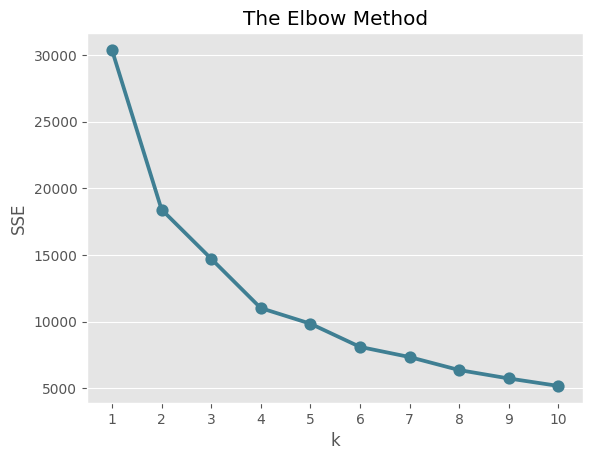

In [2208]:
scaler = StandardScaler()
rfm_df = rfm[feature_list]

rfm_scaled = scaler.fit_transform(rfm_df)

kmeans = KMeans(random_state=42)  
rfm_df["cluster"] = kmeans.fit_predict(rfm_scaled)

inertia_dict = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(rfm_scaled)
    inertia_dict[k] = kmeans.inertia_ 

plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(inertia_dict.keys()), y=list(inertia_dict.values()))
plt.show()

In [2209]:
kmeans = KMeans(n_clusters=4, random_state=42)
rfm["cluster"] = kmeans.fit_predict(rfm_scaled)

In [2210]:
rfm.head()

,CustomerID,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_score,customer_segment,cluster
0,12346.0,326,1,310.44,1,1,2,112,hibernating,1
1,12347.0,2,7,4310.00,5,5,5,555,champions,3
2,12348.0,75,4,1770.78,2,4,4,244,at_risk,2
3,12349.0,19,1,1491.72,4,1,4,414,promising,0
4,12350.0,310,1,331.46,1,1,2,112,hibernating,1


In [2211]:
rfm["recency_score"] = rfm["recency_score"].astype(int)
rfm["frequency_score"] = rfm["frequency_score"].astype(int)
rfm["monetary_score"] = rfm["monetary_score"].astype(int)
rfm["RFM_score"] = rfm["RFM_score"].astype(int)

**When compared with the RFM scores, it is observed that a meaningful clustering process has been achieved.**

In [2212]:
rfm[["cluster", "recency", "frequency", "monetary","recency_score","frequency_score","monetary_score","RFM_score"]].groupby("cluster").agg(["mean", "count"])

recency        frequency           monetary       recency_score  \
               mean count       mean count         mean count          mean   
cluster                                                                       
0         31.898551   966   1.568323   966   396.940611   966      3.814700   
1        217.928842  1321   1.392884  1321   406.897500  1321      1.353520   
2         65.470000  1100   4.057273  1100  1540.154256  1100      2.869091   
3         11.259727   951  11.266036   951  5856.122939   951      4.681388   

              frequency_score       monetary_score         RFM_score        
        count            mean count           mean count        mean count  
cluster                                                                     
0         966        2.065217   966       1.982402   966  404.104555   966  
1        1321        1.838759  1321       1.912188  1321  155.651779  1321  
2        1100        3.759091  1100       3.826364  1100  328.326364  1100  
3         951        4.684543   951       4.588854   951  519.573081   951

**Visualizing RFM Segments and Clusters Using a Heatmap**

The heatmap illustrates the correlation between RFM scores and clusters.

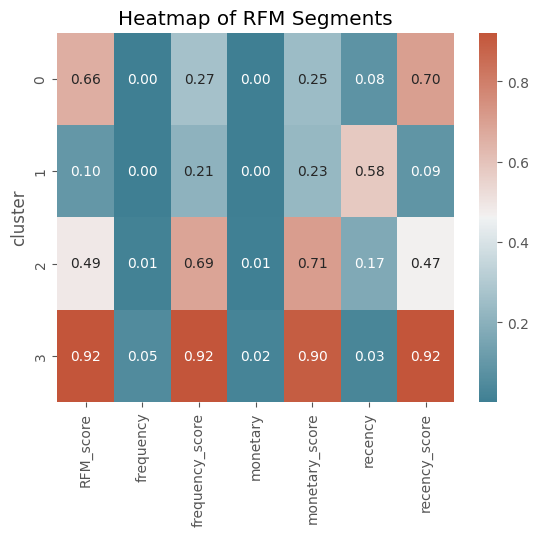

,CustomerID,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_score,customer_segment,cluster
0,12346.0,326,1,310.44,1,1,2,112,hibernating,1
1,12347.0,2,7,4310.00,5,5,5,555,champions,3
2,12348.0,75,4,1770.78,2,4,4,244,at_risk,2
3,12349.0,19,1,1491.72,4,1,4,414,promising,0
4,12350.0,310,1,331.46,1,1,2,112,hibernating,1


In [2213]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(rfm_df)
scaled_cluster_means = pd.DataFrame(scaled_data, columns=rfm_df.columns, index=rfm_df.index)
scaled_cluster_means["cluster"]= rfm["cluster"]
correlation_matrix = scaled_cluster_means.corr()
plt.title("Heatmap of RFM Segments")
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(scaled_cluster_means.groupby("cluster").mean(), annot=True, fmt=".2f",cmap = cmap)
plt.show()
rfm.head()

## 6. Creating an ML Model for Customer Purchase Propensity Prediction


The `purchase propensity` feature was generated by combining insights from both the **RFM analysis** and the **CLTV analysis**. Specifically, the customers in the **champions** segment from the RFM dataframe and the **A segment** from the CLTV dataframe were identified as having high potential for future purchases.

To create the **purchase propensity** labels, the **intersection** of these two segments (RFM champions and CLTV A segment) was used. For customers found in both segments, the `purchase propensity` value was assigned as `1`, indicating they are considered potential buyers. For all other customers, the `purchase propensity` value was assigned as `0`, marking them as non-potential buyers.

This method ensures that only customers showing strong indications of future high purchasing potential—based on both their recent and historical purchasing behavior (RFM) and their expected lifetime value (CLTV)—are labeled as potential buyers. A more accurate and balanced representation of customers likely to generate significant future value is provided by this dual-segment approach.


In [2214]:
rfm.head()

,CustomerID,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_score,customer_segment,cluster
0,12346.0,326,1,310.44,1,1,2,112,hibernating,1
1,12347.0,2,7,4310.00,5,5,5,555,champions,3
2,12348.0,75,4,1770.78,2,4,4,244,at_risk,2
3,12349.0,19,1,1491.72,4,1,4,414,promising,0
4,12350.0,310,1,331.46,1,1,2,112,hibernating,1


In [2215]:
cltv_final.head()

,CustomerID,recency,T,frequency,monetary,expected_purc_1_week,expected_purc_1_month,expected_purc_3_month,expected_average_profit,clv,clv_segment
0,12347.0,52.142857,52.428571,7,615.714286,0.141701,0.565200,5292.62723,631.891318,1131.885034,A
1,12348.0,40.285714,51.142857,4,442.695000,0.092339,0.368260,5292.62723,463.718601,541.024294,B
2,12352.0,37.142857,42.428571,8,219.542500,0.182538,0.727724,5292.62723,224.880381,517.983383,B
3,12356.0,43.142857,46.571429,3,937.143333,0.086201,0.343688,5292.62723,995.918744,1083.640587,A
4,12358.0,21.285714,21.571429,2,575.210000,0.122352,0.486634,5292.62723,631.823757,967.517121,A


In [2216]:
# Identifying the champions customers from the RFM dataframe
champions = rfm[rfm["customer_segment"] == "champions"]["CustomerID"]

# Identifying the customers from the A segment in the CLTV dataframe
a_segment_customers = cltv_final[cltv_final["clv_segment"] == "A"]["CustomerID"]

# Finding the intersection of customers between champions and A segment
purchase_propensity_customers = champions[champions.isin(a_segment_customers)]

# Updating the purchase_propensity column and assigning a value of 1 to the common customers
df["purchase_propensity"] = df["CustomerID"].apply(lambda x: 1 if x in purchase_propensity_customers.values else 0)

In [2217]:
df["purchase_propensity"].value_counts(dropna=False).reset_index()

,purchase_propensity,count
0,0,268878
1,1,123814


**selected RFM features merged with main df**

In [2218]:
new_features = ["CustomerID","recency","frequency","monetary","cluster","recency_score","frequency_score","monetary_score"]
df = df.merge(rfm[new_features], on="CustomerID", how= "left")

In [2219]:
check_df(df)

##################### Shape #####################
(392692, 26)
##################### Types #####################
InvoiceNo                          object
StockCode                          object
Description                        object
Quantity                          float64
InvoiceDate                datetime64[ns]
UnitPrice                         float64
CustomerID                        float64
Country                            object
TotalPrice                        float64
InvoiceDate_daily                  object
InvoiceDate_monthly                 int32
weekday                             int32
CohortMonth                     period[M]
TransactionMonth                period[M]
CohortIndex                         int64
expected_average_profit           float64
clv                               float64
clv_segment                      category
purchase_propensity                 int64
recency                             int64
frequency                           int64
monet

CustomerID Check

In [2220]:
assert rfm["CustomerID"].nunique() == df["CustomerID"].nunique()

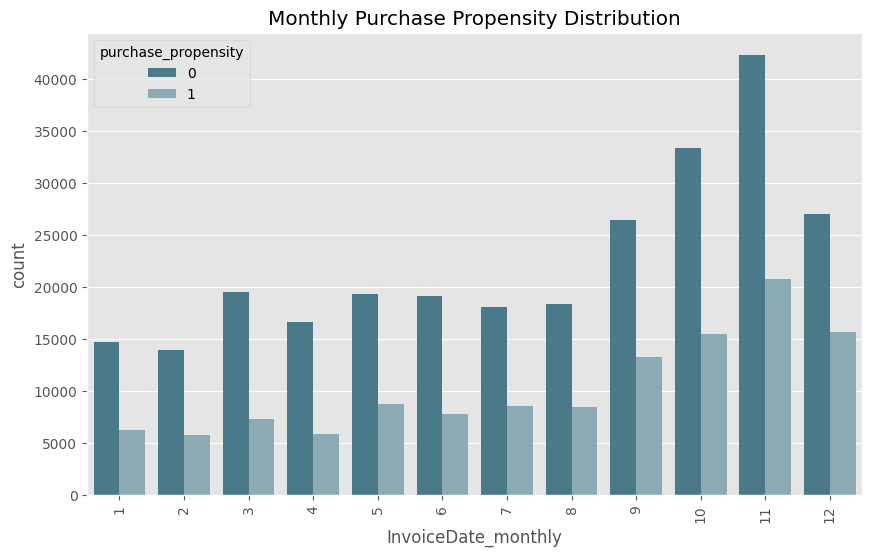

In [2221]:
plt.figure(figsize=(10, 6))
sns.countplot(x="InvoiceDate_monthly", hue="purchase_propensity",data=df)
plt.xticks(rotation=90)
plt.title("Monthly Purchase Propensity Distribution")
plt.show()

### 6.1. Feature Engineering

**Adding avg_time_between_purchases Feature to the Dataset**

This feature calculates the average time (in days) between consecutive purchases for each customer and maps it to the main dataset.

In [2222]:
df["timeDiff"] = df.groupby("CustomerID")["InvoiceDate"].diff().dt.days
df["timeDiff"] = df.groupby("CustomerID")["timeDiff"].fillna(method="bfill") 
avg_time = df.groupby("CustomerID")["timeDiff"].mean().reset_index(name="AvgTimeBetweenPurchases")
avg_time["AvgTimeBetweenPurchases"].fillna(method="bfill", inplace=True) 
avg_time.head()

,CustomerID,AvgTimeBetweenPurchases
0,12346.0,1.989011
1,12347.0,1.989011
2,12348.0,9.096774
3,12349.0,0.000000
4,12350.0,0.000000


In [2223]:
df = df.merge(avg_time, on="CustomerID", how="left")
df.drop("timeDiff", axis=1, inplace=True)

**Categorize the descriptions using LLM**

The Gemini API was applied to the descriptions; however, due to reaching the API limit, the operation was canceled. Therefore, this feature will not be used in the modeling process.

In [2224]:
# model = genai.GenerativeModel(
#     'gemini-1.5-flash-latest',
#     generation_config=genai.GenerationConfig(
#         temperature=0.1,
#         top_p=1,
#         max_output_tokens=50, 
#     ))

# description_list = df["Description"].str.strip().unique().tolist()

# few_shot_prompt = """
# Classify the following product description into the correct category. 
# If you cannot find the category name in the EXAMPLES, generate a new category. New category generation number must be below 20:

# EXAMPLE:
# 'BLACK CANDELABRA T-LIGHT HOLDER' => 'home_accessories'

# EXAMPLE:
# 'AIRLINE BAG VINTAGE JET SET BROWN' => 'womens_handbags'

# EXAMPLE:
# 'COLOUR GLASS. STAR T-LIGHT HOLDER' => 'home_accessories'

# EXAMPLE:
# 'MINI PAINT SET VINTAGE' => 'stationery'

# EXAMPLE:
# 'CLEAR DRAWER KNOB ACRYLIC EDWARDIAN' => 'home_hardware'

# Description: "{description}"
# """

# response_dict = {}

# for description in tqdm(description_list, desc="Processing descriptions", unit="description"):
#     formatted_prompt = few_shot_prompt.format(description=description)
#     response = model.generate_content([formatted_prompt])
#     category = response.text.strip()
#     response_dict[description] = category

# print(response_dict)


**Time Series Features**

In [2225]:
df_time_series_group = df.groupby("InvoiceDate_daily")["TotalPrice"].sum().reset_index()
df_time_series_group["InvoiceDate_daily"] = pd.to_datetime(df_time_series_group["InvoiceDate_daily"])

df_time_series_group["TotalPrice_rolling_1_month"] = df_time_series_group["TotalPrice"].rolling(window=30).mean()
df_time_series_group["TotalPrice_rolling_3_month"] = df_time_series_group["TotalPrice"].rolling(window=90).mean()
df_time_series_group["TotalPrice_pct_change_1_month"] = df_time_series_group["TotalPrice"].pct_change(periods=30)
df_time_series_group["TotalPrice_pct_change_3_month"] = df_time_series_group["TotalPrice"].pct_change(periods=90)
df_time_series_group.bfill(inplace=True)
df_time_series_group.ffill(inplace=True)
df_time_series_group.drop("TotalPrice",axis = 1, inplace=True)
df_time_series_group.head()

,InvoiceDate_daily,TotalPrice_rolling_1_month,TotalPrice_rolling_3_month,TotalPrice_pct_change_1_month,TotalPrice_pct_change_3_month
0,2010-12-01,25709.707667,20853.113444,-0.853934,-0.794648
1,2010-12-02,25709.707667,20853.113444,-0.853934,-0.794648
2,2010-12-03,25709.707667,20853.113444,-0.853934,-0.794648
3,2010-12-05,25709.707667,20853.113444,-0.853934,-0.794648
4,2010-12-06,25709.707667,20853.113444,-0.853934,-0.794648


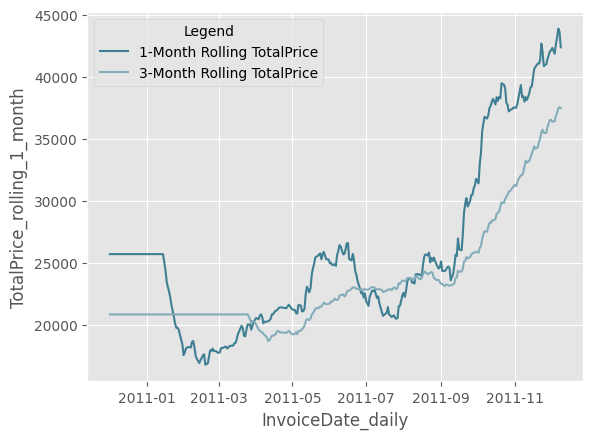

In [2226]:
sns.lineplot(data=df_time_series_group, x="InvoiceDate_daily", y="TotalPrice_rolling_1_month",label="1-Month Rolling TotalPrice" )
sns.lineplot(data=df_time_series_group, x="InvoiceDate_daily", y="TotalPrice_rolling_3_month",label="3-Month Rolling TotalPrice")
plt.legend(title="Legend")
plt.show()

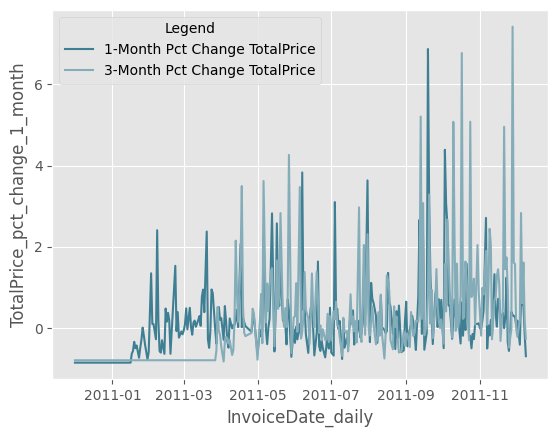

In [2227]:
sns.lineplot(data=df_time_series_group, x="InvoiceDate_daily", y="TotalPrice_pct_change_1_month",label = "1-Month Pct Change TotalPrice")
sns.lineplot(data=df_time_series_group, x="InvoiceDate_daily", y="TotalPrice_pct_change_3_month",label = "3-Month Pct Change TotalPrice")
plt.legend(title="Legend")
plt.show()

In [2228]:
df_time_series_group["InvoiceDate_daily"] = df_time_series_group["InvoiceDate_daily"].dt.date
df = df.merge(df_time_series_group, on="InvoiceDate_daily", how="left")

In [2229]:
check_df(df)

##################### Shape #####################
(392692, 31)
##################### Types #####################
InvoiceNo                                object
StockCode                                object
Description                              object
Quantity                                float64
InvoiceDate                      datetime64[ns]
UnitPrice                               float64
CustomerID                              float64
Country                                  object
TotalPrice                              float64
InvoiceDate_daily                        object
InvoiceDate_monthly                       int32
weekday                                   int32
CohortMonth                           period[M]
TransactionMonth                      period[M]
CohortIndex                               int64
expected_average_profit                 float64
clv                                     float64
clv_segment                            category
purchase_propensity    

### 6.2. Corelation Analysis

In [2230]:
columns_will_not_use = ["InvoiceNo","StockCode","Description","InvoiceDate","CustomerID","Country","InvoiceDate_daily","CohortMonth","TransactionMonth","CohortIndex","clv_segment"]
model_features = df.columns.difference(columns_will_not_use)
model_features

Index(['AvgTimeBetweenPurchases', 'InvoiceDate_monthly', 'Quantity',
       'TotalPrice', 'TotalPrice_pct_change_1_month',
       'TotalPrice_pct_change_3_month', 'TotalPrice_rolling_1_month',
       'TotalPrice_rolling_3_month', 'UnitPrice', 'cluster', 'clv',
       'expected_average_profit', 'frequency', 'frequency_score', 'monetary',
       'monetary_score', 'purchase_propensity', 'recency', 'recency_score',
       'weekday'],
      dtype='object')

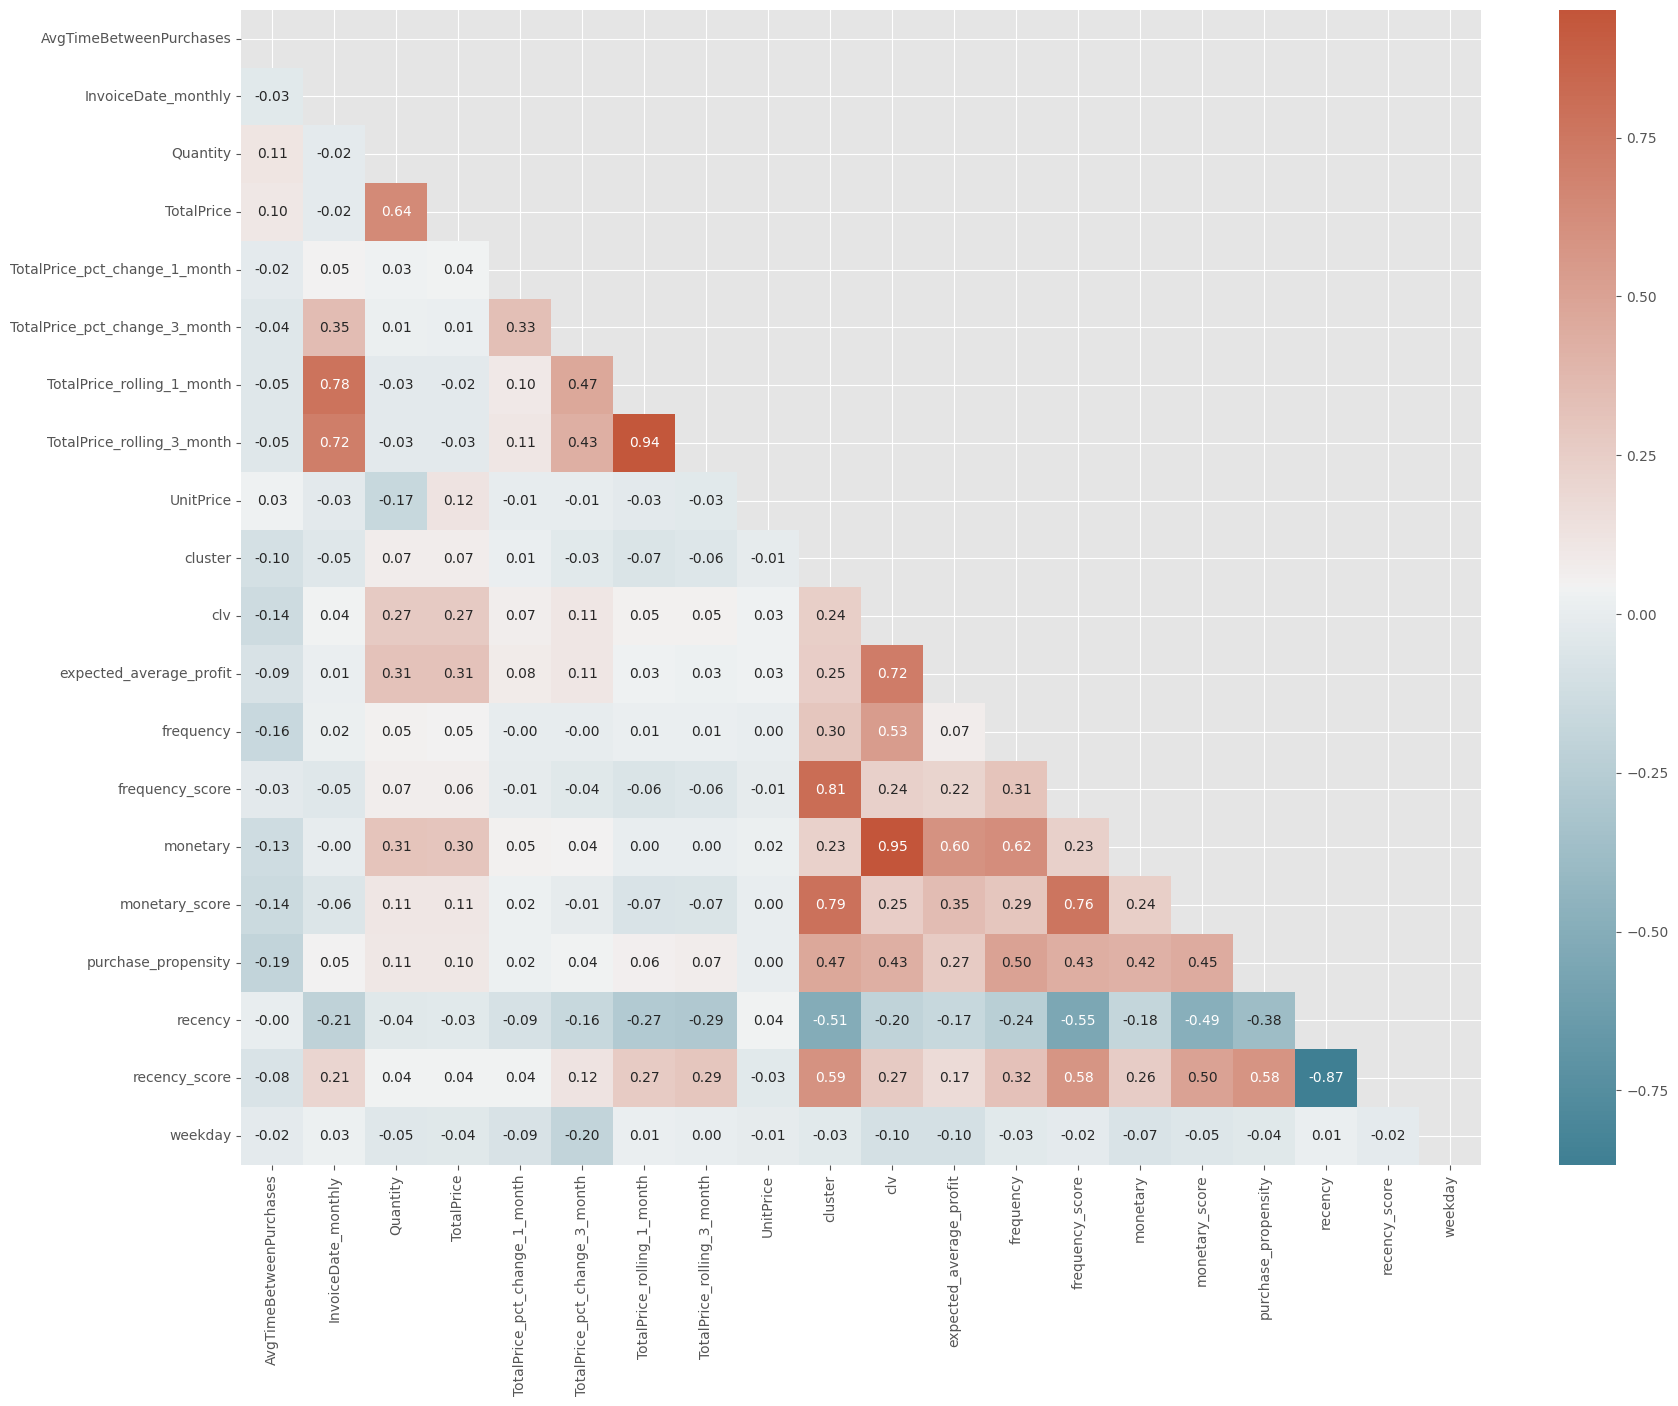

In [2231]:
plt.figure(figsize=(20, 15))
df = df[model_features]
corr_df = df.corr()
mask = np.triu(np.ones_like(corr_df, dtype=bool))
tri_df = corr_df.mask(mask)
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(tri_df,annot=True,fmt=".2f",cmap = cmap)
plt.show()

**Highly correlated features may cause a multicollinearity problem, which can negatively affect model performance and lead to overfitting. For this reason, if there is a correlation above 0.70 between two features, one of them is dropped from the dataset.**

In [2232]:
highly_corelated_features = ["TotalPrice_rolling_1_month","recency","monetary_score","frequency_score","monetary"]
df.drop(highly_corelated_features, axis=1, inplace=True)

### 6.3. Purchase Propensity Prediction Using Logistic Regression

A **Logistic Regression** model was chosen for predicting **purchase propensity**, and a high accuracy of **0.98** was achieved, demonstrating excellent model performance. 

To address the **class imbalance** issue, the **SMOTE oversampling technique** was applied, which helps balance the distribution of classes by generating synthetic data points for the minority class.

**GridSearch** was utilized to identify the optimal hyperparameters, ensuring the best performance of the model.

The **accuracy** metric was selected to evaluate the overall model performance. Additionally, to assess the model's ability to distinguish between classes, the **roc_auc_score** was chosen. A **ROC curve** was plotted to visualize and further analyze the model's classification performance.


In [2272]:
def train_and_evaluate_model(
    model: BaseEstimator, 
    X_train: pd.DataFrame, 
    y_train: pd.Series, 
    X_test: pd.DataFrame, 
    y_test: pd.Series,
    score_func: Callable[[pd.Series, pd.Series], float], 
    cv_type: BaseCrossValidator, 
    plot: bool = True
) -> Tuple[BaseEstimator, float, pd.DataFrame, pd.Series]:
    """
    This function uses cross-validation method to evaluate the performance of a model 
    and detect issues like overfitting or underfitting.

    Parameters:
    model : BaseEstimator
        The model to be trained.
    X_train : pd.DataFrame
        The training feature dataset.
    y_train : pd.Series
        The target variable for training.
    X_test : pd.DataFrame
        The test feature dataset.
    y_test : pd.Series
        The target variable for testing.
    score_func : Callable[[pd.Series, pd.Series], float]
        Evaluation metric function. E.g., accuracy_score, precision_score, etc.
    cv_type : BaseCrossValidator
        Cross-validation strategy (e.g., KFold, StratifiedKFold).
    plot : bool, optional (default=True)
        Whether to plot the training and validation scores.

    Returns:
    model : BaseEstimator
        The trained model.
    final_test_score : float
        The evaluation metric score on the test set.
    scores_df : pd.DataFrame
        DataFrame containing the train and validation scores for each fold.
    y_pred_test : pd.Series
        Predictions on the test set. If the score metric is roc_auc_score, it returns predicted probabilities.
    """
    
    # Type checking for input parameters
    if not callable(score_func):
        raise ValueError("score_func must be a callable function.")
    
    if not isinstance(cv_type, BaseCrossValidator):
        raise ValueError("cv_type must be a cross-validation object (e.g., KFold or StratifiedKFold).")
    
    # Defining the score lists
    train_scores: list[float] = []
    validation_scores: list[float] = []
    score_per_fold: list[int] = []
    fold: int = 1

    # Cross-validation stage for detecting overfitting or underfitting
    for train_index, test_index in cv_type.split(X_train, y_train):
        X_train_cv, X_validation_cv = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train_cv, y_validation_cv = y_train.iloc[train_index], y_train.iloc[test_index]

        # Model fitting on cross-validation training set
        model.fit(X_train_cv, y_train_cv)
        y_pred_train = model.predict(X_train_cv)
        y_pred_validation = model.predict(X_validation_cv)
        
        # Calculate train score
        train_score = score_func(y_train_cv, y_pred_train)
        # Calculate validation score
        validation_score = score_func(y_validation_cv, y_pred_validation)

        # Add scores to the train and validation lists
        train_scores.append(train_score)
        validation_scores.append(validation_score)

        # Print the scores per fold
        print(f'Fold {fold} train_{score_func.__name__}: {train_score:.5f}')
        print(f'Fold {fold} validation_{score_func.__name__}: {validation_score:.5f}')
        
        fold += 1
        # Fold list for plotting stage
        score_per_fold.append(fold)

    print("Cross-validation stage has been completed! Model is starting training...")

    # Model trained on the entire training set
    model.fit(X_train, y_train)
    print("*******************************************")
    print("Model training stage has been completed!")
    print("*******************************************")

    # Predict on test set (if roc_auc_score is used, return predicted probabilities for class 1)
    if score_func.__name__ == "roc_auc_score":
        y_pred_test = model.predict_proba(X_test)[:, 1]
    else:
        y_pred_test = model.predict(X_test)
    
    # Evaluate final test score
    final_test_score = score_func(y_test, y_pred_test)

    # Store train and validation scores in a dictionary for DataFrame
    scores_dict = {
        "fold": range(1, len(score_per_fold) + 1),
        f"train_{score_func.__name__}": train_scores,
        f"validation_{score_func.__name__}": validation_scores
    }
    scores_df = pd.DataFrame(scores_dict)

    # Calculate percentage differences
    percentage_difference_train_valid = ((np.mean(validation_scores) - np.mean(train_scores)) / np.mean(train_scores)) * 100
    percentage_difference_train_test = ((final_test_score - np.mean(train_scores)) / np.mean(train_scores)) * 100

    print(f"Average train_{score_func.__name__} result: {np.mean(train_scores):.5f}")
    print(f'Average validation_{score_func.__name__} result: {np.mean(validation_scores):.5f}')
    print(f'Final test_{score_func.__name__} result: {final_test_score:.5f}')
    print(f'Validation percentage according to train:%{percentage_difference_train_valid:.2f}')
    print(f'Final test percentage according to train:%{percentage_difference_train_test:.2f}')
    
    # Print confusion matrix for classification problems
    if score_func.__name__ in ["precision_score", "recall_score", "f1_score"]:
        cf_matrix = confusion_matrix(y_test, y_pred_test)
        print(f"Confusion Matrix on Final Test Set:\n {cf_matrix}")

    print("*******************************************")

    # Plot training and validation scores if required
    if plot:
        sns.lineplot(data=scores_df, x="fold", y=f"train_{score_func.__name__}", marker="o", label=f"train_{score_func.__name__}")
        sns.lineplot(data=scores_df, x="fold", y=f"validation_{score_func.__name__}", marker="v", label=f"validation_{score_func.__name__}")
        plt.xlabel("Fold")
        plt.ylabel(f"{score_func.__name__}")
        plt.title(f"{score_func.__name__} of each fold")
        plt.legend()
        plt.show()

    return model, final_test_score, scores_df, y_pred_test


In [2235]:
def plot_roc_curve(y_true: Union[pd.Series, np.ndarray], y_pred_prob: Union[pd.Series, np.ndarray]) -> None:
    """
    This function computes and plots the Receiver Operating Characteristic (ROC) curve 
    and calculates the Area Under the Curve (AUC).

    Parameters:
    y_true : Union[pd.Series, np.ndarray]
        The true binary labels (0 or 1) for the test set. 
        Can be a pandas Series or a numpy array.
    
    y_pred_prob : Union[pd.Series, np.ndarray]
        The predicted probabilities of the positive class (class 1).
        Can be a pandas Series or a numpy array.

    Returns:
    None
        This function does not return anything. It only displays the ROC curve plot.
    
    Raises:
    ValueError
        If `y_true` and `y_pred_prob` do not have the same length, or if they are not 1D arrays/series.
    """
    
    # Type and length check
    if len(y_true) != len(y_pred_prob):
        raise ValueError("y_true and y_pred_prob must have the same length.")
    
    if not (isinstance(y_true, (pd.Series, np.ndarray)) and isinstance(y_pred_prob, (pd.Series, np.ndarray))):
        raise ValueError("Both y_true and y_pred_prob must be either pandas Series or numpy arrays.")
    
    if y_true.ndim != 1 or y_pred_prob.ndim != 1:
        raise ValueError("y_true and y_pred_prob must be 1-dimensional arrays/series.")

    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)

    # Compute Area Under Curve (AUC)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color="teal", lw=2, label="ROC curve (area = %0.2f)" % roc_auc)
    plt.plot([0, 1], [0, 1], color="lightsteelblue", lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend(loc="lower right")
    plt.show()

**Data Splitting**

In [2236]:
target = "purchase_propensity"
columns_that_will_not_used = ["purchase_propensity"]
features = [col for col in df.columns if col not in columns_that_will_not_used]
X = df[features]
y= df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

In [2237]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [2238]:
print(X_train_smote.shape)
print(X_test.shape)
print(y_train_smote.shape)
print(y_test.shape)
y_train_smote.value_counts(normalize=True) * 100

(430204, 14)
(78539, 14)
(430204,)
(78539,)


purchase_propensity
1    50.0
0    50.0
Name: proportion, dtype: float64

**LogisticRegression**

**HyperParameter Tuning**

In [2262]:
skf = StratifiedKFold(n_splits=10,shuffle=True,random_state=42)
scoring = make_scorer(accuracy_score) 
lr_cv = LogisticRegression()

lr_pipeline_cv = Pipeline([
    ("scaler", StandardScaler()),
    ("classifier", lr_cv)
])

params_lr = {
    "classifier__penalty": ["l1", "l2","elasticnet"],
    "classifier__C": [0.0001, 0.001, 0.01, 1, 10],
    "classifier__class_weight": ["balanced"] 
} 


grid_rf = GridSearchCV(estimator=lr_pipeline_cv,param_grid=params_lr,cv=skf,scoring=scoring,verbose=1,n_jobs=1)
grid_rf.fit(X_train_smote,y_train_smote)
best_hyperparams_lr = grid_rf.best_params_
best_score_lr = grid_rf.best_score_
print("Best Hyperparams of Logistic Regression:", best_hyperparams_lr)
print("Best score:", best_score_lr)

Fitting 10 folds for each of 15 candidates, totalling 150 fits
Best Hyperparams of Logistic Regression: {'classifier__C': 10, 'classifier__class_weight': 'balanced', 'classifier__penalty': 'l2'}
Best score: 0.9774525577126438


In [2263]:
best_hyperparams_lr = {'C': 10, 'class_weight': 'balanced', 'penalty': 'l2'}

Fold 1 train_accuracy_score: 0.97641
Fold 1 validation_accuracy_score: 0.97685
Fold 2 train_accuracy_score: 0.97707
Fold 2 validation_accuracy_score: 0.97713
Fold 3 train_accuracy_score: 0.97668
Fold 3 validation_accuracy_score: 0.97741
Fold 4 train_accuracy_score: 0.97778
Fold 4 validation_accuracy_score: 0.97829
Fold 5 train_accuracy_score: 0.97810
Fold 5 validation_accuracy_score: 0.97750
Fold 6 train_accuracy_score: 0.97781
Fold 6 validation_accuracy_score: 0.97836
Fold 7 train_accuracy_score: 0.97852
Fold 7 validation_accuracy_score: 0.97738
Fold 8 train_accuracy_score: 0.97771
Fold 8 validation_accuracy_score: 0.97787
Fold 9 train_accuracy_score: 0.97645
Fold 9 validation_accuracy_score: 0.97594
Fold 10 train_accuracy_score: 0.97786
Fold 10 validation_accuracy_score: 0.97780
Cross-validation stage has been completed! Model is starting training...
*******************************************
Model training stage has been completed!
*******************************************
Averag

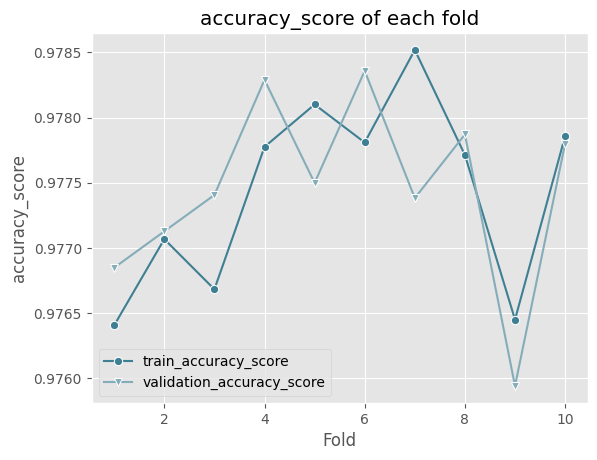

In [2271]:
lr = LogisticRegression(**best_hyperparams_lr, random_state=22)

lr_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("classifier", lr)
])

skf = StratifiedKFold(n_splits=10,shuffle=True,random_state=42)
lr_model, lr_final_test_accuracy_score, lr_accuracy_scores_df,lr_y_pred_test = train_and_evaluate_model(lr_pipeline, X_train_smote, y_train_smote, X_test, y_test,accuracy_score, skf, plot=True)

**Roc Auc Score**

Fold 1 train_roc_auc_score: 0.97643
Fold 1 validation_roc_auc_score: 0.97751
Fold 2 train_roc_auc_score: 0.97711
Fold 2 validation_roc_auc_score: 0.97658
Fold 3 train_roc_auc_score: 0.97685
Fold 3 validation_roc_auc_score: 0.97769
Fold 4 train_roc_auc_score: 0.97670
Fold 4 validation_roc_auc_score: 0.97648
Fold 5 train_roc_auc_score: 0.97633
Fold 5 validation_roc_auc_score: 0.97796
Fold 6 train_roc_auc_score: 0.97765
Fold 6 validation_roc_auc_score: 0.97701
Fold 7 train_roc_auc_score: 0.97658
Fold 7 validation_roc_auc_score: 0.97675
Fold 8 train_roc_auc_score: 0.97645
Fold 8 validation_roc_auc_score: 0.97462
Fold 9 train_roc_auc_score: 0.97732
Fold 9 validation_roc_auc_score: 0.97658
Fold 10 train_roc_auc_score: 0.97709
Fold 10 validation_roc_auc_score: 0.97673
Cross-validation stage has been completed! Model is starting training...
*******************************************
Model training stage has been completed!
*******************************************
Average train_roc_auc_scor

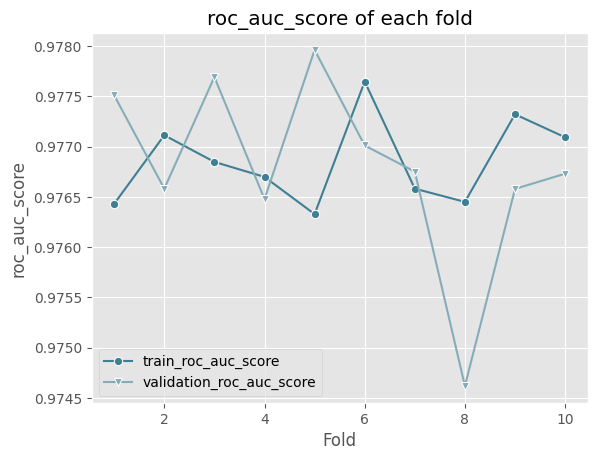

In [2265]:
lr_model, lr_final_test_roc_auc_score, lr_roc_auc_score_df,lr_y_pred_test = train_and_evaluate_model(lr_pipeline, X_train, y_train, X_test, y_test,roc_auc_score, skf, plot=True)

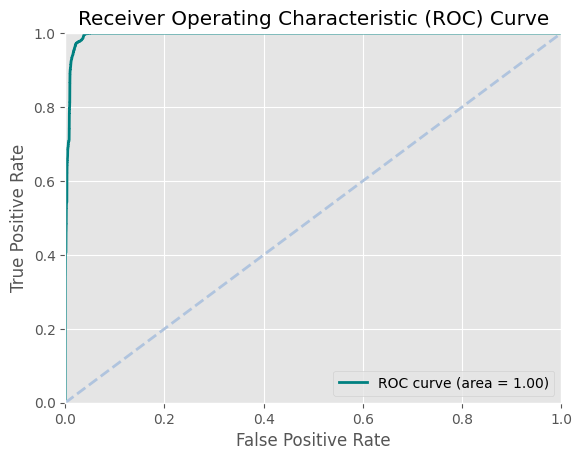

In [2266]:
plot_roc_curve(y_test,lr_y_pred_test)

**Logistic Regression Feature importances**

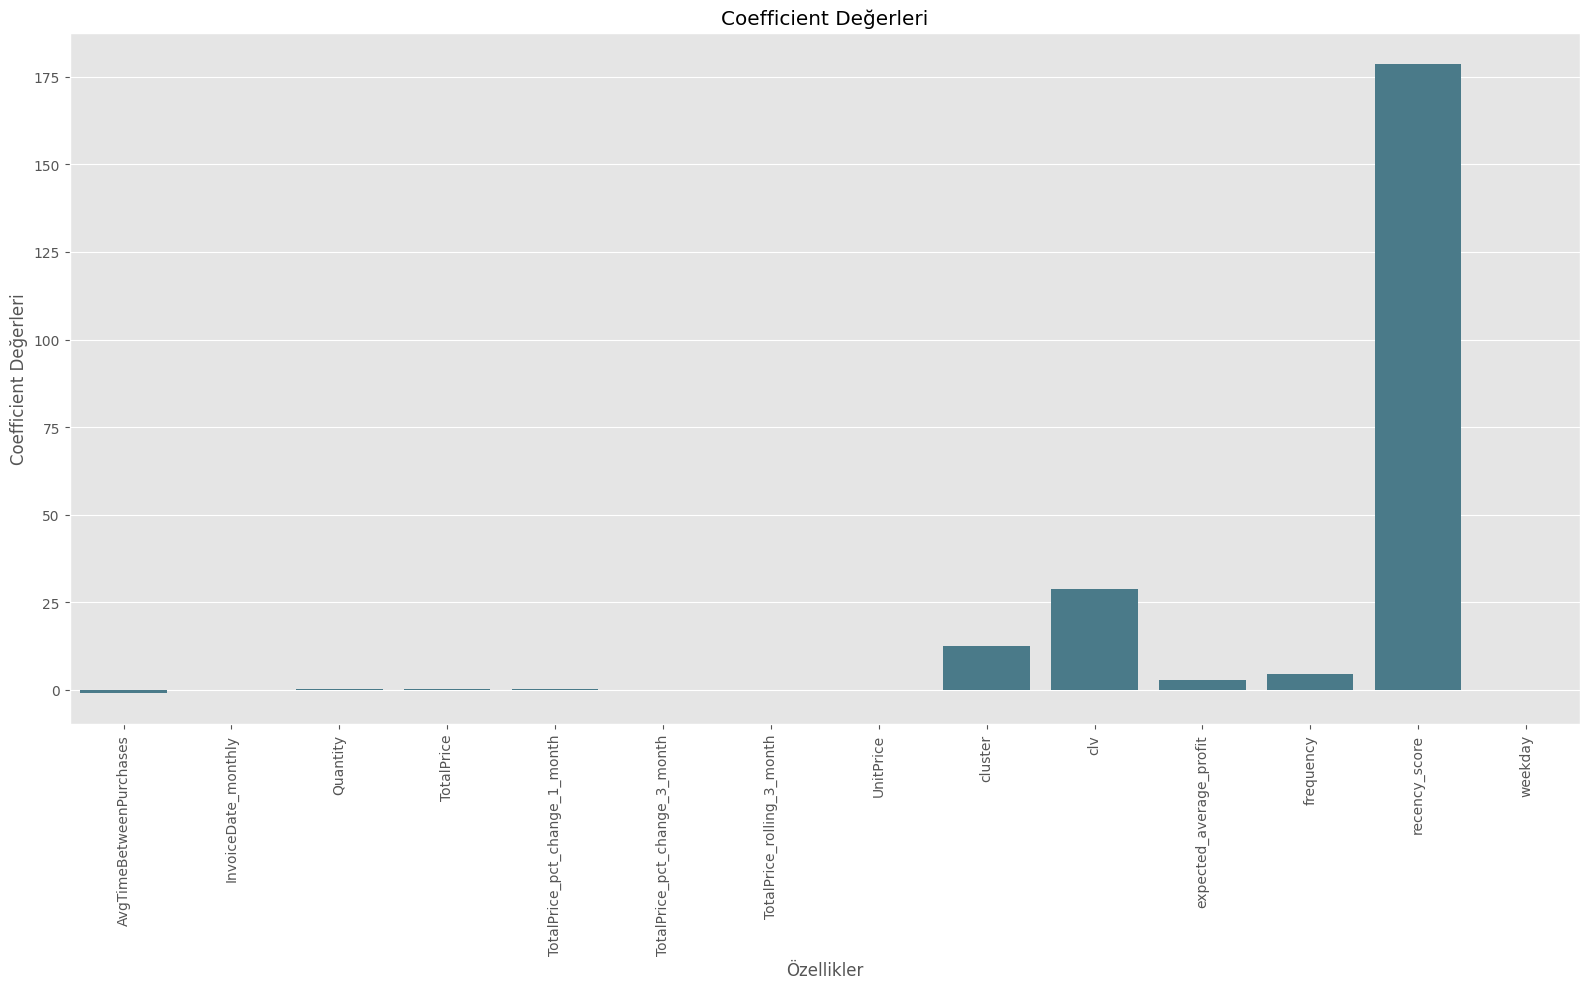

In [2267]:
coef_values = lr_model.named_steps["classifier"].coef_[0]
columns = X_train.columns

plt.figure(figsize=(16, 10))
sns.barplot(x=columns, y=coef_values)
plt.xlabel("Özellikler")
plt.ylabel("Coefficient Değerleri")
plt.title("Coefficient Değerleri")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## 7. Conclusion

In this study, data was cleaned and necessary exploratory data analysis (EDA) was conducted. Subsequently, several analytical techniques were applied:

1. **Cohort Analysis**: This technique involves grouping customers into cohorts based on their first purchase date and tracking their behavior over time. It is widely used in business to understand customer retention, engagement, and lifecycle trends. By identifying patterns across different cohorts, businesses can make more informed decisions on marketing strategies and customer engagement.

2. **Customer Lifetime Value (CLTV) Prediction with BG-NBD and Gamma-Gamma Submodel**: BG-NBD (Beta Geometric Negative Binomial Distribution) and Gamma-Gamma models are used to predict future customer behavior, specifically focusing on purchase frequency and monetary value. These models help businesses forecast the total value a customer will bring over time, enabling more effective resource allocation, personalized marketing, and customer retention strategies.

3. **RFM Analysis (Recency, Frequency, Monetary)**: RFM analysis segments customers based on their transaction history—how recently they made a purchase, how often they purchase, and how much they spend. This technique is crucial in identifying high-value customers, improving customer targeting, and optimizing marketing efforts. Businesses can prioritize efforts on retaining high-value customers and understanding the factors that drive customer loyalty.

Using the insights gained from these analyses, a **purchase propensity** target variable was created. A **Logistic Regression** model was then trained and predicted the propensity for customers to make future purchases, achieving a high accuracy of **98%**. This model can assist businesses in identifying high-potential customers, optimizing marketing spend, and improving customer acquisition and retention strategies.
